<a href="https://colab.research.google.com/github/Rifki243/Membangun-Proyek-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Muhamad_Rifki_Ardi_Priadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang saya gunakan yaitu **Beverage Sales** (https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales/data)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas, sehingga cocok untuk analisis unsupervised learning (clustering).
   - **Jumlah Baris**: Jumlah baris sebanyak 8.999.910, memenuhi kriteria minimal 2.500 baris untuk proyek ini.
   - **Tipe Data**: Mengandung tipe data **Kategorikal** dan **Numerikal**

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from google.colab import drive
drive.mount('/content/drive')
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.neighbors import NearestNeighbors
from itertools import combinations
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox, yeojohnson
from IPython.display import display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [48]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Beverage Sales/synthetic_beverage_sales_data.csv"
df = pd.read_csv(file_path)
df.head()

Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66        53      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56        90      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17        73      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22        59      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87        35      0.10        27.40  Baden-Württemberg  2023-08-23

## Keterangan
- `Order_ID` : Identifikasi unik untuk setiap pesanan. Satu pesanan bisa berisi beberapa produk.
- `Customer_ID` : Identifikasi unik untuk setiap pelanggan, digunakan untuk membedakan pembeli.
- `Customer_Type` : Menunjukkan apakah pelanggan adalah B2B (business-to-business, bisnis ke bisnis) atau B2C (business-to-consumer, bisnis ke konsumen).
- `Product`:  Nama produk yang dibeli, seperti Coca-Cola atau Erdinger Weißbier.
- `Category` : Kategori dari produk, misalnya Soft Drinks (minuman ringan) atau Alcoholic Beverages (minuman beralkohol).
- `Unit_Price` : Harga per satuan dari produk yang dibeli.
- `Quantity` : Jumlah unit produk yang dibeli dalam pesanan tersebut.
- `Discount` : Diskon yang diberikan untuk produk tersebut (misalnya 0.1 berarti diskon 10%) dan hanya diberikan kepada pelanggan B2B.
- `Total_Price` : Total harga setelah diskon diterapkan (Unit_Price × Quantity - Discount).
- `Region` : Wilayah tempat pelanggan berada, misalnya Bayern atau Berlin.
- `Order_Date` : Tanggal saat pesanan dibuat.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **1. Memahami Struktur Data**

In [49]:
print("Jumlah kolom pada dataset :", df.shape[1])
print("Jumlah baris pada dataset :", df.shape[0])

Jumlah kolom pada dataset : 11
Jumlah baris pada dataset : 8999910


In [50]:
df.dtypes

Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object

In [51]:
categorical_columns = []
numerical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
print("Kolom kategorikal:", categorical_columns)
print("Kolom numerikal:", numerical_columns)

Kolom kategorikal: ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Region', 'Order_Date']
Kolom numerikal: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']


## **2. Menangani Data yang Hilang**

In [52]:
df.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

In [53]:
# Merubah tipe data waktu
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [54]:
categorical_columns = []
numerical_columns = []
datetime_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    elif df[column].dtype == 'datetime64[ns]':
        datetime_columns.append(column)
    else:
        numerical_columns.append(column)
print("Kolom kategorikal:", categorical_columns)
print("Kolom numerikal:", numerical_columns)
print("Kolom datetime:", datetime_columns)
print(f"\nJumlah kolom kategorikal: {len(categorical_columns)}, kolom numerikal: {len(numerical_columns)}, kolom datetime: {len(datetime_columns)}")
print("\nTotal kolom:", len(categorical_columns) + len(numerical_columns) + len(datetime_columns))

Kolom kategorikal: ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Region']
Kolom numerikal: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
Kolom datetime: ['Order_Date']

Jumlah kolom kategorikal: 6, kolom numerikal: 4, kolom datetime: 1

Total kolom: 11


## **3. Analisis Distribusi dan Korelasi**

In [55]:
df[numerical_columns].describe()

Unit_Price      Quantity      Discount   Total_Price
count  8.999910e+06  8.999910e+06  8.999910e+06  8.999910e+06
mean   5.818037e+00  2.313813e+01  2.972879e-02  1.307437e+02
std    1.470050e+01  2.689321e+01  4.479841e-02  5.096947e+02
min    3.200000e-01  1.000000e+00  0.000000e+00  3.000000e-01
25%    1.050000e+00  6.000000e+00  0.000000e+00  8.400000e+00
50%    1.750000e+00  1.100000e+01  0.000000e+00  2.114000e+01
75%    3.210000e+00  3.000000e+01  5.000000e-02  6.949000e+01
max    1.695300e+02  1.000000e+02  1.500000e-01  1.429530e+04

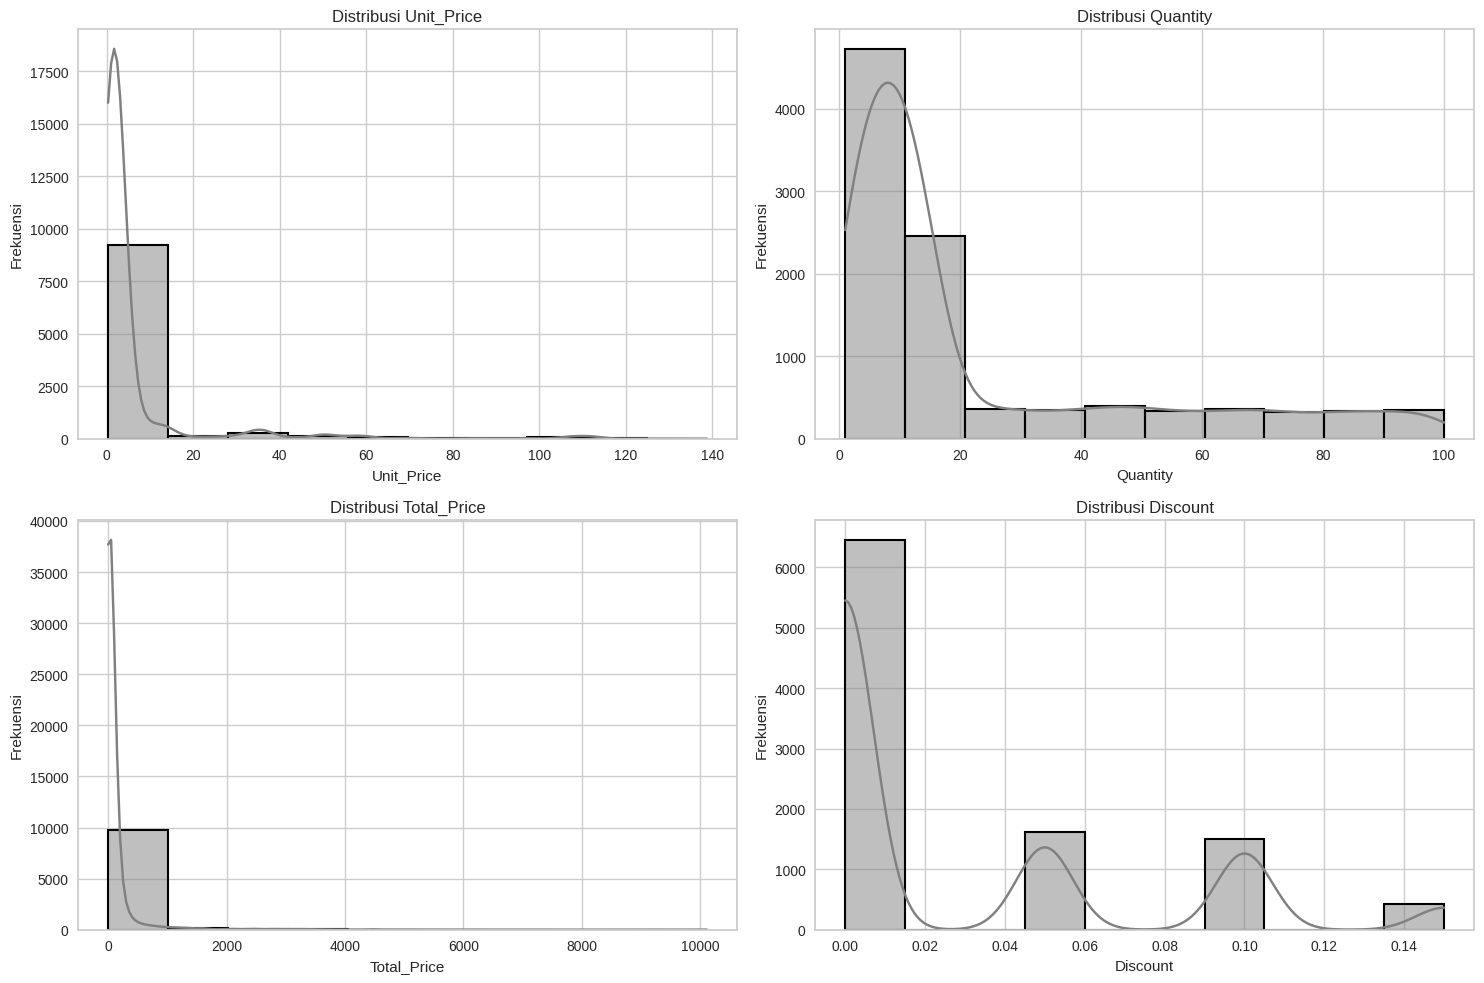

In [56]:
# Ambil sample data acak
df_sample = df.sample(n=10000, random_state=42)

# List kolom numerik yang mau diplot
numerical_columns = ['Unit_Price', 'Quantity', 'Total_Price', 'Discount']

# Buat subplots dengan jumlah baris sesuai banyaknya kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Ubah ke array 1D biar gampang di-loop
axes = axes.flatten()

# Loop untuk plot histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(df_sample[col], bins=10, kde=True, ax=axes[i], color='grey', linewidth=1.5)
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_ylabel("Frekuensi")

# Hapus subplot kosong kalau jumlah kolom ganjil
if len(numerical_columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

**Kesimpulan**
1. Unit_Price (Harga Satuan):
- Mayoritas nilai sangat kecil, sementara ada beberapa harga satuan yang sangat tinggi.
- Distribusi ini menunjukkan ekor panjang ke kanan → right-skewed.

2. Quantity (Jumlah Barang):
- Sebagian besar transaksi memiliki jumlah barang kecil, dengan beberapa transaksi yang memiliki jumlah sangat besar.
- Ada ekor panjang ke kanan → right-skewed.

3. Total_Price (Total Harga):
- Mirip dengan Unit_Price, sebagian besar transaksi memiliki total harga rendah, tetapi ada beberapa transaksi dengan total harga yang sangat tinggi.
- Ekor panjang ke kanan → right-skewed.

4. Discount (Diskon):
- Mayoritas nilai berada di sekitar nol, tetapi ada beberapa titik diskon yang lebih besar.
- Meskipun distribusi ini tampak memiliki beberapa puncak (bimodal/multimodal), secara keseluruhan masih menunjukkan ekor ke kanan → right-skewed.

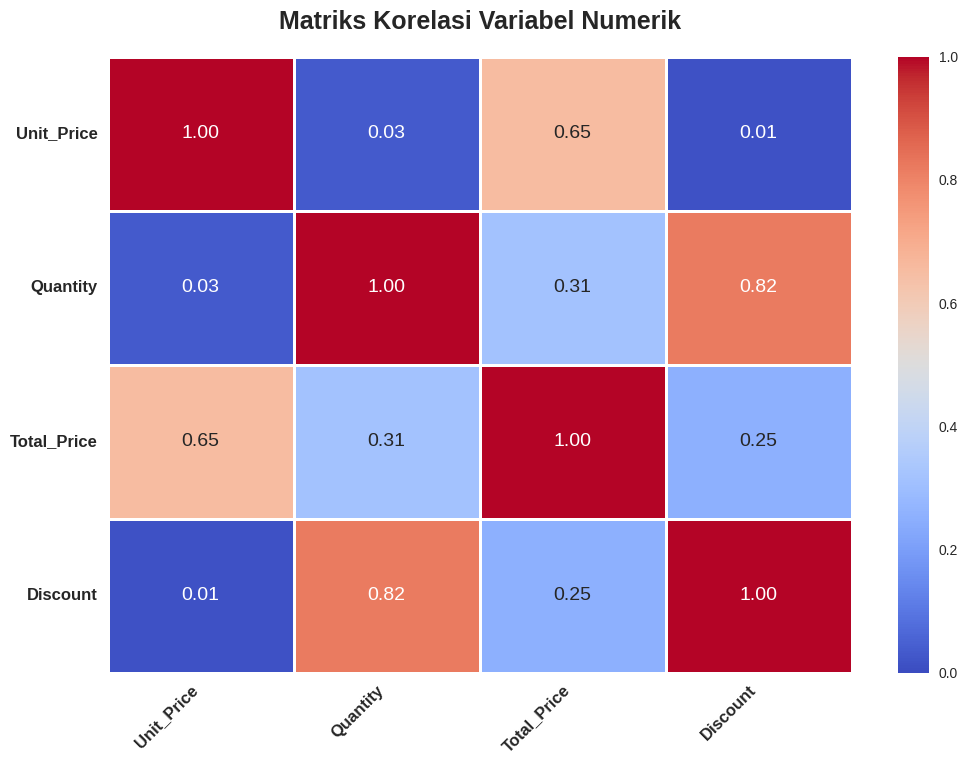

In [57]:
# Membuat matriks korelasi variabel numerik
plt.figure(figsize=(12, 8))

# Buat heatmap dengan tambahan style
sns.heatmap(df_sample[numerical_columns].corr(),
            annot=True,        # Menampilkan angka korelasi
            fmt=".2f",         # Format angka korelasi 2 desimal
            cmap="coolwarm",     # Warna merah-biru yang lebih smooth
            linewidths=2,      # Menambahkan garis pemisah antar kotak
            linecolor="white", # Warna garis pemisah
            annot_kws={"size":14},  # Ukuran font angka korelasi
            vmin=0, vmax=1)   # Range nilai korelasi dari -1 sampai 1

# Tambahkan judul dengan font lebih besar
plt.title("Matriks Korelasi Variabel Numerik", fontsize=18, fontweight="bold", pad=20)

# Perbesar label sumbu agar lebih jelas
plt.xticks(fontsize=12, rotation=45, ha="right", fontweight="bold")
plt.yticks(fontsize=12, rotation=0, fontweight="bold")

# Tampilkan plot
plt.show()

**Kesimpulan**
1. Unit_Price vs Total_Price (0.65 → Korelasi positif sedang-kuat)
- Harga satuan memiliki hubungan positif dengan total harga, tetapi tidak terlalu kuat.
- Artinya, kenaikan harga satuan memang meningkatkan total harga, tetapi ada faktor lain yang juga mempengaruhinya (seperti jumlah yang dibeli).

2. Quantity vs Total_Price (0.31 → Korelasi positif lemah-sedang)
- Jumlah barang yang dibeli juga berkontribusi terhadap total harga, tetapi tidak sekuat harga satuan.
- Hal ini bisa terjadi jika ada variasi besar dalam harga produk (misalnya, produk mahal tetapi dibeli dalam jumlah kecil tetap menghasilkan total harga tinggi).

3. Discount vs Quantity (0.82 → Korelasi positif kuat)
- Korelasi tinggi ini menunjukkan bahwa semakin besar diskon yang diberikan, semakin banyak produk yang dibeli.
- Hal ini masuk akal karena pelanggan mungkin terdorong untuk membeli dalam jumlah lebih besar jika mendapatkan diskon lebih tinggi.

4. Discount vs Total_Price (0.25 → Korelasi positif lemah-sedang)
- Diskon memiliki korelasi lemah dengan total harga.
- Meskipun diskon mendorong peningkatan jumlah pembelian, dampaknya terhadap total harga masih terbatas. Hal ini mungkin karena diskon mengurangi harga per unit, yang mengimbangi kenaikan jumlah barang yang dibeli.

5. Unit_Price vs Quantity (0.03 → Korelasi hampir nol, tidak ada hubungan)
- Harga satuan tidak berpengaruh signifikan terhadap jumlah barang yang dibeli.
- Artinya, pelanggan tidak selalu membeli lebih banyak barang hanya karena harganya lebih murah, atau sebaliknya.

6. Unit_Price vs Discount (0.01 → Korelasi hampir nol, tidak ada hubungan)
- Tidak ada hubungan antara harga satuan dan diskon, yang menunjukkan bahwa diskon diberikan tanpa mempertimbangkan harga produk tertentu.

## **4. Visualisasi Data**

<ipython-input-58-0fd0dd0d671e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_sample, order=df_sample[col].value_counts().index, palette="coolwarm", ax=axes[i])
<ipython-input-58-0fd0dd0d671e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_sample, order=df_sample[col].value_counts().index, palette="coolwarm", ax=axes[i])
<ipython-input-58-0fd0dd0d671e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_sample, order=df_sample[col].value_counts().index, palette="coolwarm", ax=axes[i])
<

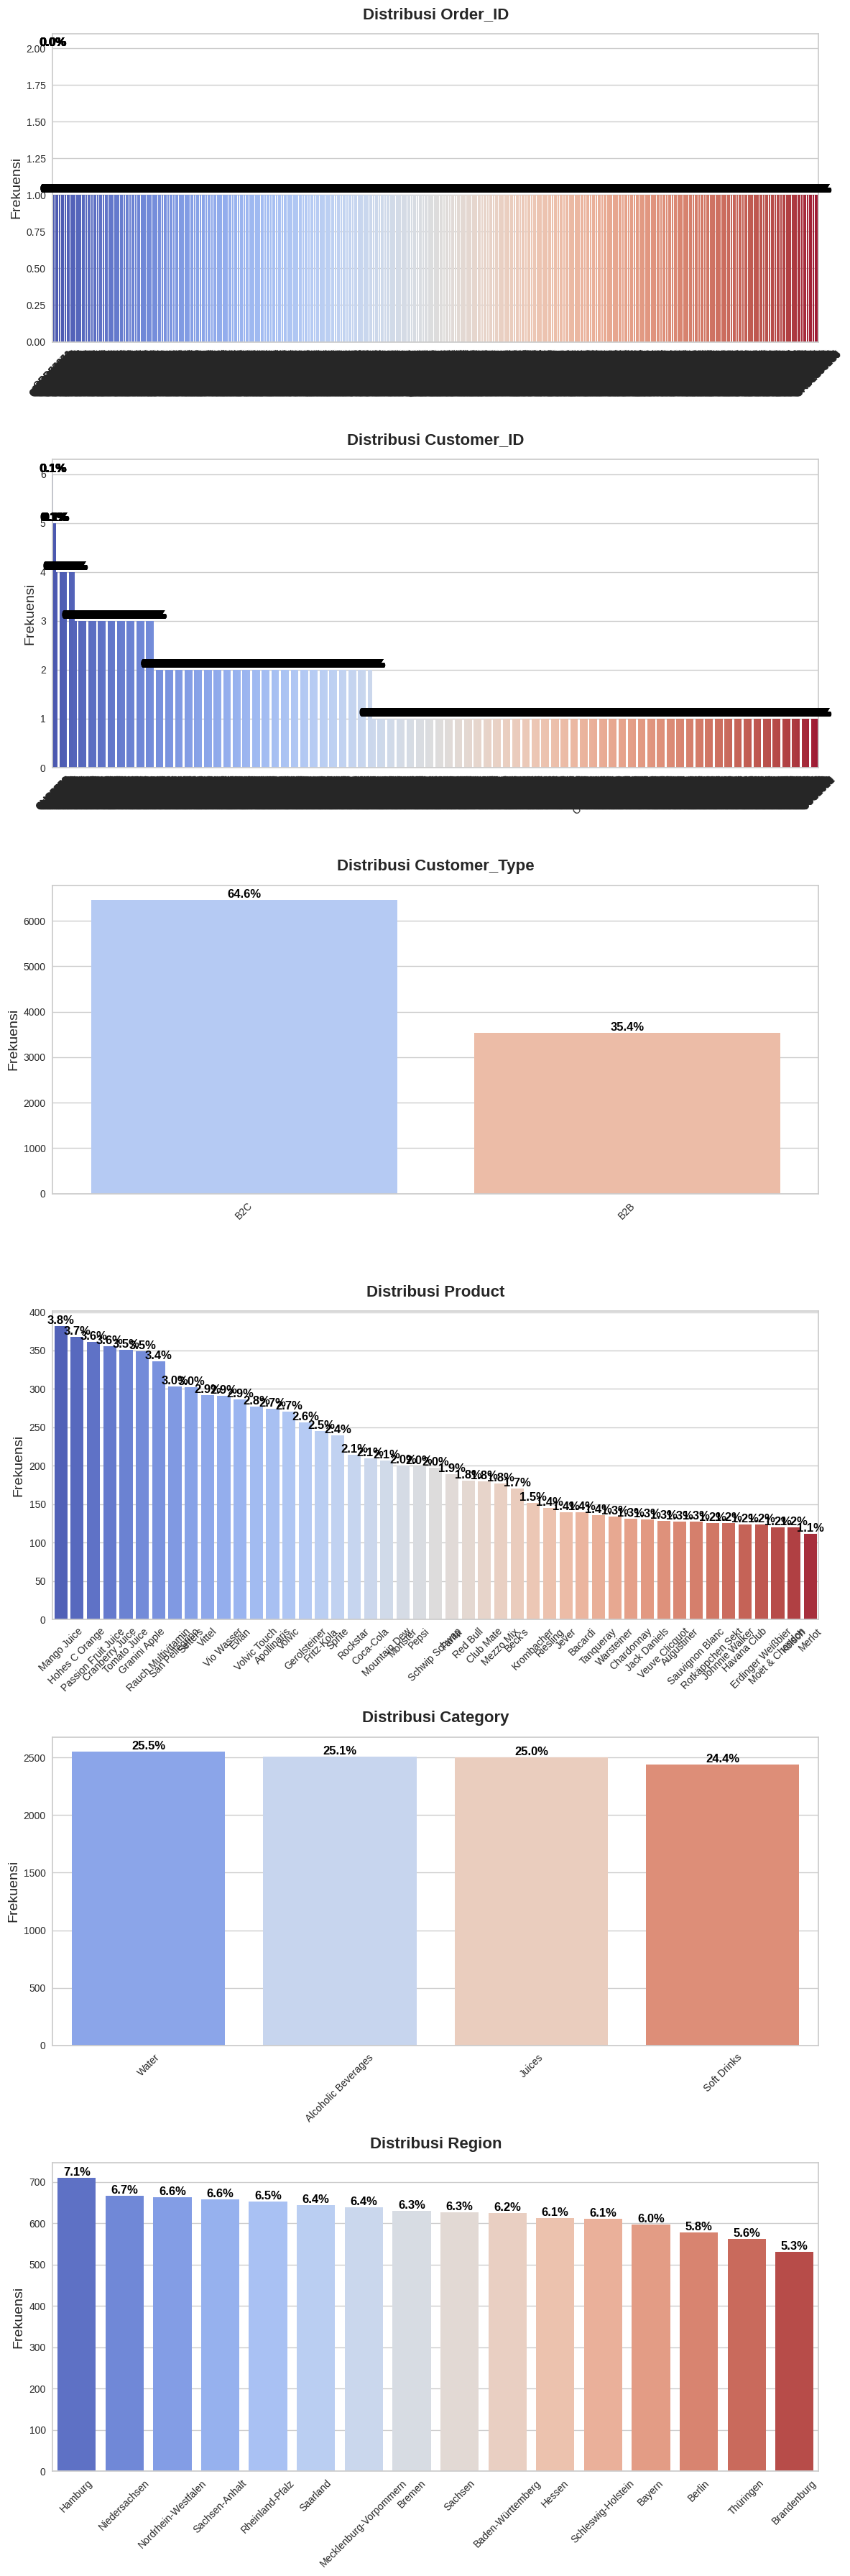

In [58]:
# Pilih kolom kategorikal
categorical_columns = ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Region']

# Buat figure dengan ukuran yang cukup besar
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 6 * len(categorical_columns)))

# Pastikan jika hanya ada satu kategori, `axes` tetap dalam bentuk array
if len(categorical_columns) == 1:
    axes = [axes]

# Loop untuk membuat barplot setiap kolom kategorikal
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df_sample, order=df_sample[col].value_counts().index, palette="coolwarm", ax=axes[i])

    # Menambahkan persentase pada setiap bar
    total = len(df_sample[col])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'  # Hitung persentase
        x = p.get_x() + p.get_width() / 2  # Posisi X untuk teks
        y = p.get_height()  # Posisi Y untuk teks
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    # Styling tambahan
    axes[i].set_title(f'Distribusi {col}', fontsize=16, fontweight="bold", pad=15)
    axes[i].set_ylabel("Frekuensi", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

# Layout yang lebih rapi
plt.tight_layout()
plt.show()

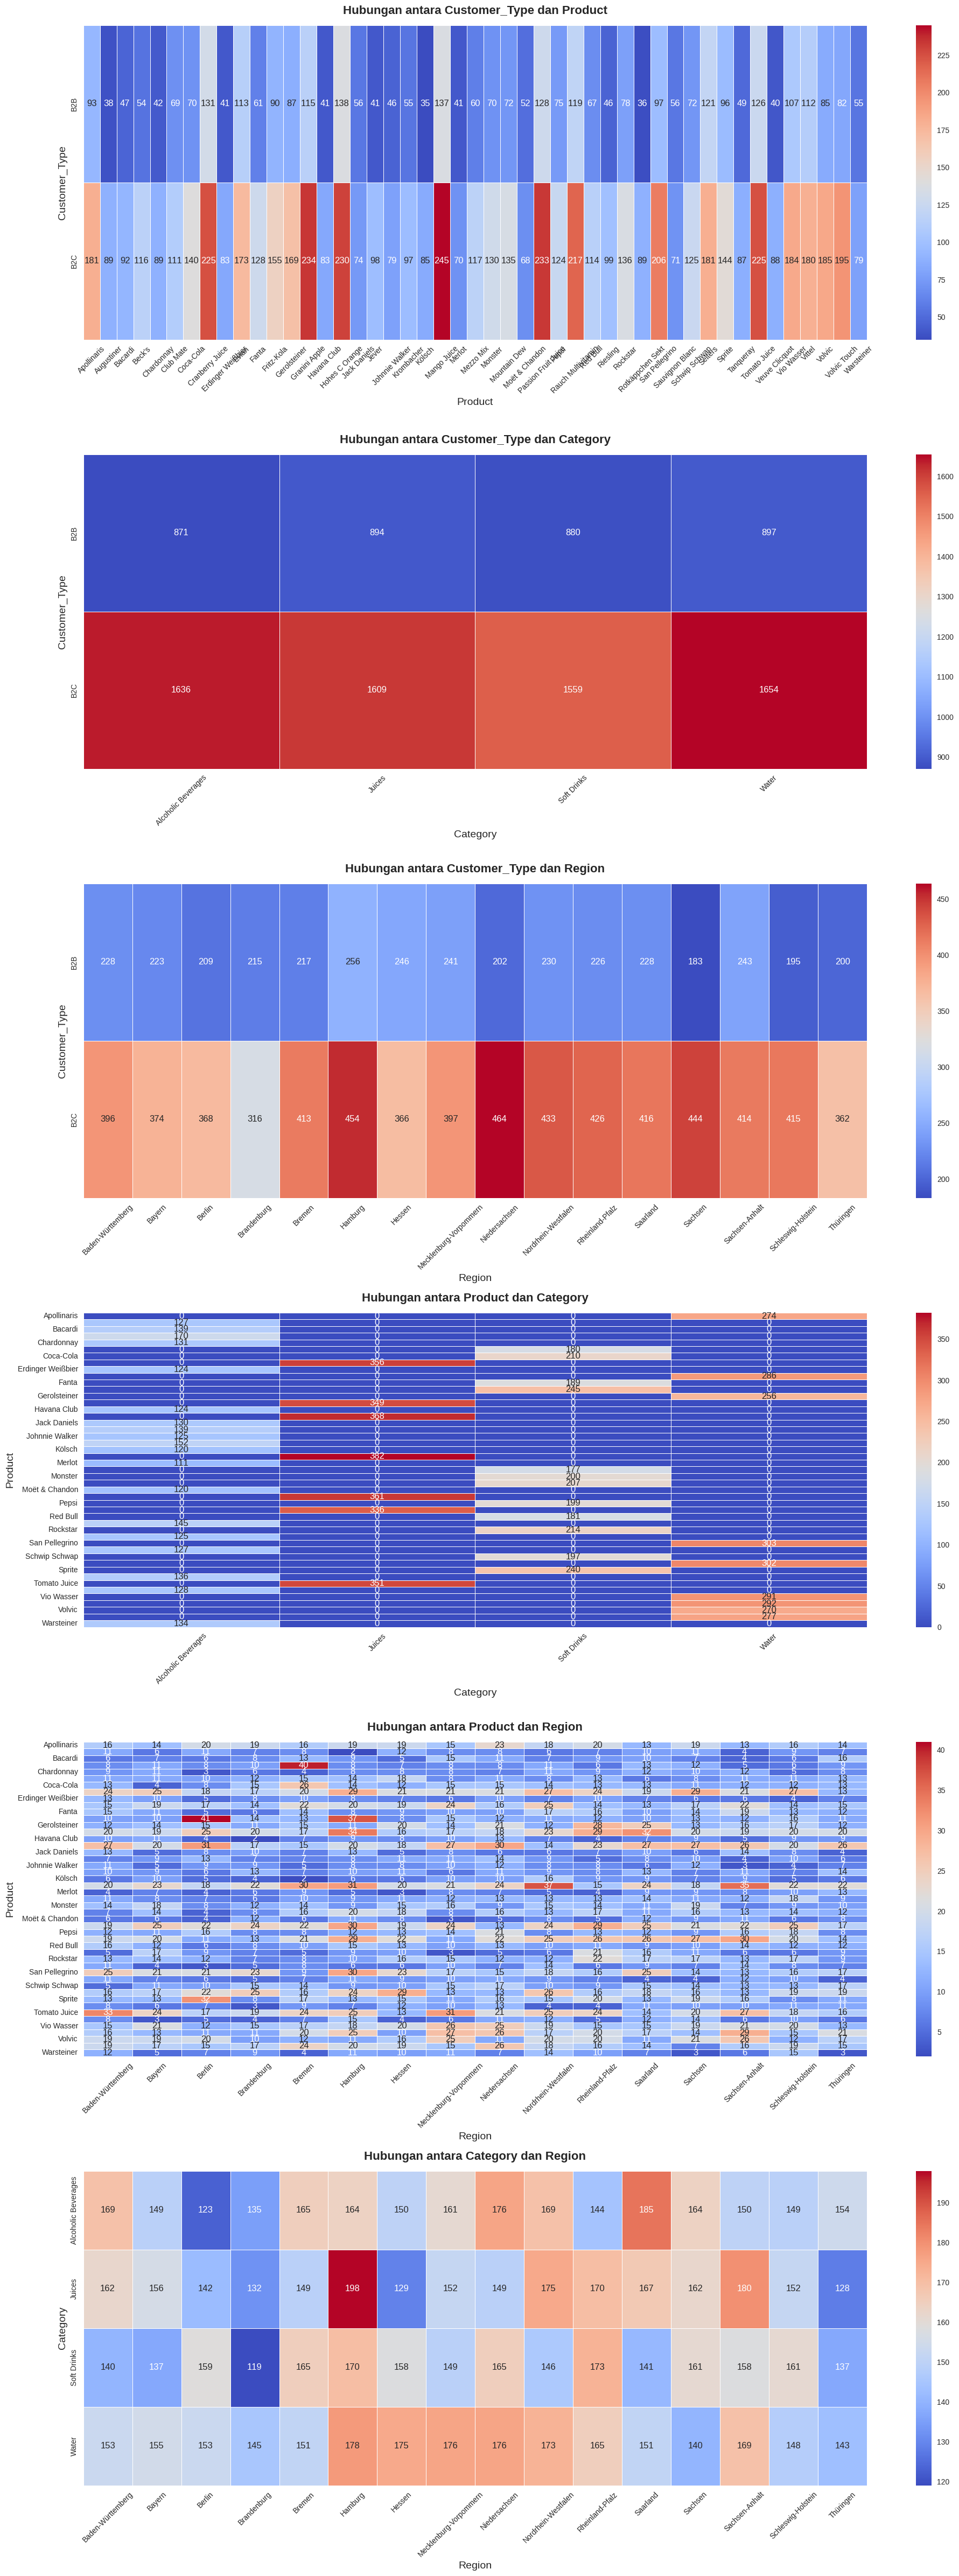

In [59]:
# Pilih kolom kategori yang diinginkan tanpa mengubah categorical_columns
selected_columns = [col for col in categorical_columns if col not in ['Order_ID', 'Customer_ID']]

# Buat semua kombinasi pasangan kolom
column_pairs = list(itertools.combinations(selected_columns, 2))  # Semua kombinasi 2 kolom

# Buat figure dengan ukuran yang cukup besar
fig, axes = plt.subplots(nrows=len(column_pairs), ncols=1, figsize=(20, 8 * len(column_pairs)))

# Jika hanya ada satu kategori, pastikan axes tetap dalam bentuk array
if len(column_pairs) == 1:
    axes = [axes]

# Loop untuk membuat heatmap setiap pasangan kolom kategorikal
for i, (col1, col2) in enumerate(column_pairs):
    # Crosstab untuk menghitung jumlah kemunculan kombinasi
    crosstab_result = pd.crosstab(df_sample[col1], df_sample[col2])

    # Buat heatmap di subplot
    sns.heatmap(crosstab_result, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5, ax=axes[i])

    # Styling tambahan
    axes[i].set_title(f"Hubungan antara {col1} dan {col2}", fontsize=16, fontweight="bold", pad=15)
    axes[i].set_xlabel(col2, fontsize=14)
    axes[i].set_ylabel(col1, fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

# Layout yang lebih rapi
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **1. Menghapus atau Menangani Data Kosong (Missing Values)**

In [60]:
missing_values = df.isnull().sum()
print("Jumlah missing values pada setiap kolom:")
print(missing_values)

Jumlah missing values pada setiap kolom:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


## **2. Menghapus Data Duplikat**

In [61]:
print("Jumlah data duplikat:", df_sample.duplicated().sum())
print("Jumlah sebelum menghapus duplikat:", len(df_sample))
df_cleaned = df_sample.drop_duplicates()
print("Jumlah setelah menghapus duplikat:", len(df_cleaned))

Jumlah data duplikat: 0
Jumlah sebelum menghapus duplikat: 10000
Jumlah setelah menghapus duplikat: 10000


## **3. Normalisasi dan Standarisasi Fitur**

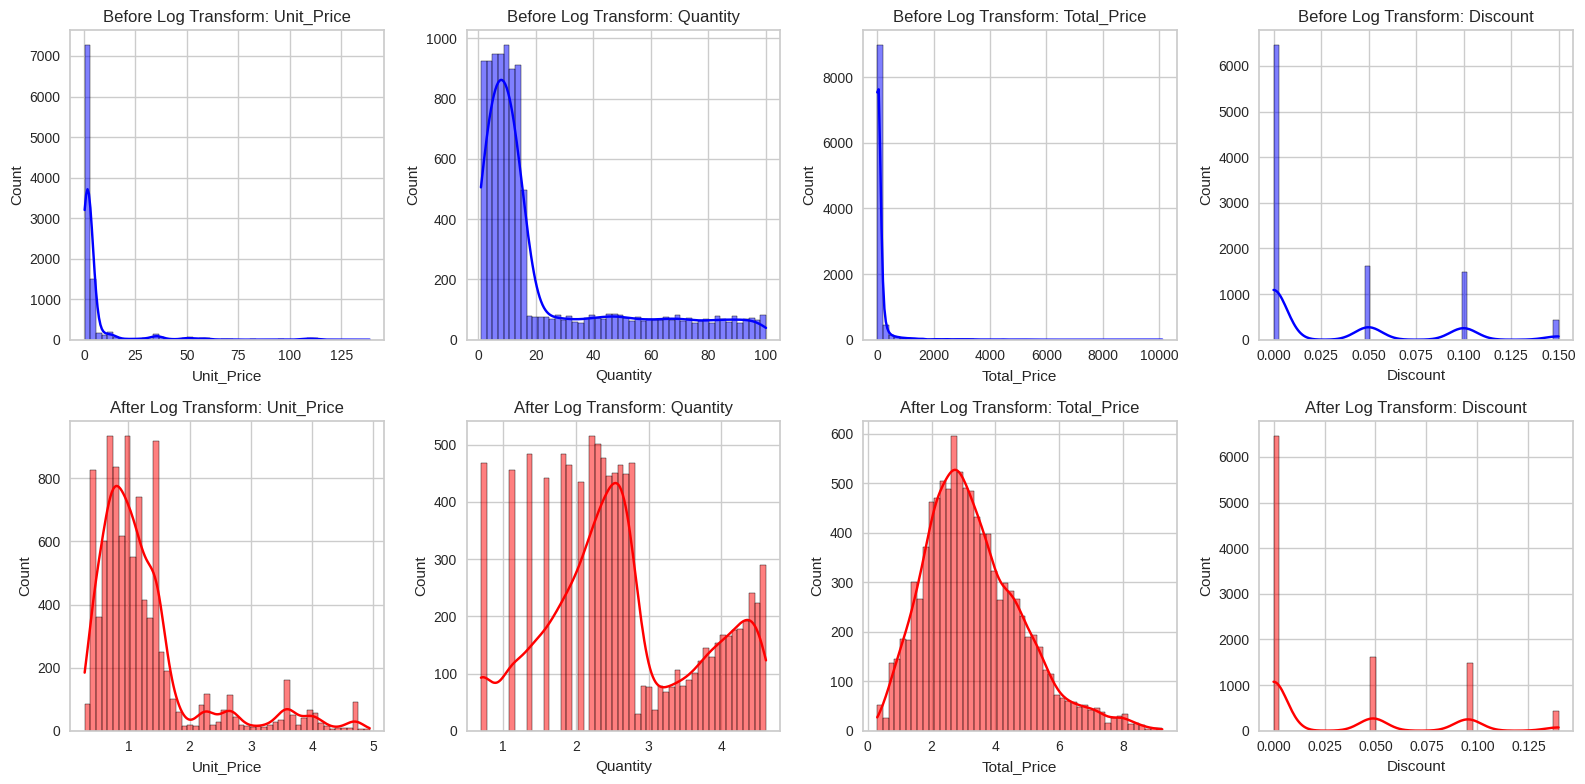

In [62]:
# Log Transformation dengan menggunakan numerical_columns
df_log = df_sample.copy()

# Terapkan log1p ke semua kolom numerik secara otomatis
df_log[numerical_columns] = np.log1p(df_sample[numerical_columns])

# Visualisasi hasil sebelum & sesudah log transform
fig, axes = plt.subplots(2, len(numerical_columns), figsize=(4 * len(numerical_columns), 8))

for i, col in enumerate(numerical_columns):
    sns.histplot(df_sample[col], bins=50, kde=True, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f'Before Log Transform: {col}')

    sns.histplot(df_log[col], bins=50, kde=True, ax=axes[1, i], color='red')
    axes[1, i].set_title(f'After Log Transform: {col}')

plt.tight_layout()
plt.show()

**Kesimpulan**

Setelah dilakukannya proses normalisasi untuk menghilangkan skewness menggunakan Log Transformation hasilnya sudah menjadi ditribusi yang normal dan tersebar merata, namun pada distribusi diskon masih mengalami skewness setelah proses normalisasi yang dikarenakan fitur diskon hanya diberikan kepada pelanggan B2B, sedangkan `df_sample` yang diambil itu random.

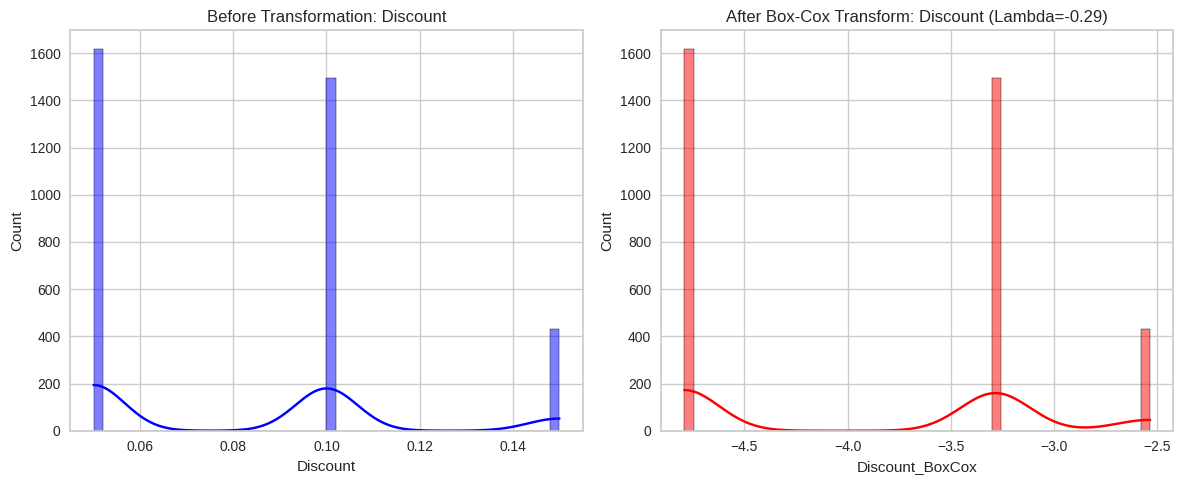

In [63]:
# Filter hanya pelanggan B2B
df_b2b = df_sample[df_sample['Customer_Type'] == 'B2B'].copy()

# Cek distribusi diskon sebelum transformasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_b2b['Discount'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Before Transformation: Discount')

# Terapkan Box-Cox Transform (hanya untuk nilai positif)
df_b2b['Discount_BoxCox'], lambda_bc = boxcox(df_b2b['Discount'] + 1e-5)  # Tambahkan nilai kecil untuk menghindari nol

# Visualisasi setelah Box-Cox Transform
sns.histplot(df_b2b['Discount_BoxCox'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title(f'After Box-Cox Transform: Discount (Lambda={lambda_bc:.2f})')

plt.tight_layout()
plt.show()

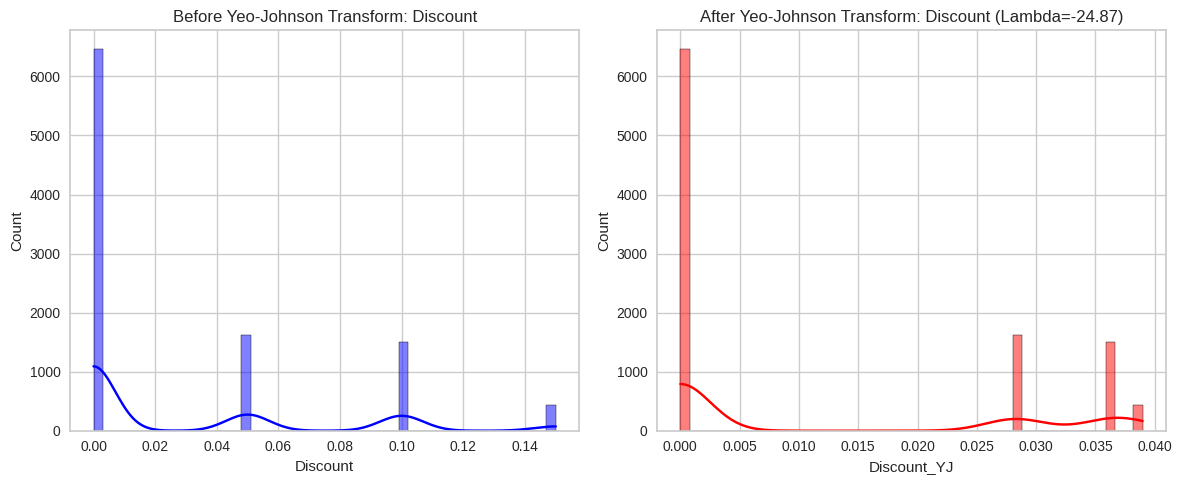

In [64]:
# Terapkan Yeo-Johnson Transformation
df_sample['Discount_YJ'], lambda_yj = yeojohnson(df_sample['Discount'] + 1e-5)  # Tambahkan nilai kecil untuk menghindari nol

# Visualisasi sebelum dan sesudah transformasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram sebelum transformasi
sns.histplot(df_sample['Discount'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Before Yeo-Johnson Transform: Discount')

# Histogram setelah transformasi
sns.histplot(df_sample['Discount_YJ'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title(f'After Yeo-Johnson Transform: Discount (Lambda={lambda_yj:.2f})')

plt.tight_layout()
plt.show()

**Kesimpulan**

Setelah dilakukan proses normalisasi menggunakan cara yang lain seperti Box-Cox dan Yeo-Johnson Transformation  hasilnya masih skewness, ini mungkin disebabkan karena fitur diskon hanya diberikan kepada pelanggan B2B, sedangkan `df_sample` yang diambil itu random.

## **4. Deteksi dan Penanganan Outlier**

In [65]:
Q1 = df_sample[numerical_columns].quantile(0.25)
Q3 = df_sample[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_sample[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_sample[numerical_columns] > (Q3 + 1.5 * IQR)))
df_outliers = df_sample[outliers.any(axis=1)]  # Menampilkan baris dengan outlier

print(f"Jumlah outlier: {df_outliers.shape[0]}")
print(f"Jumlah data sebelum menghapus outlier: {df_sample.shape[0]}")
print(f"Persentase outlier: {df_outliers.shape[0] / df_sample.shape[0] * 100:.2f}%")

Jumlah outlier: 2449
Jumlah data sebelum menghapus outlier: 10000
Persentase outlier: 24.49%


In [66]:
# Cek outlier di seluruh dataset (bukan hanya sampel)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
df_outliers = df[outliers.any(axis=1)]

print(f"Jumlah outlier di dataset asli: {df_outliers.shape[0]}")
print(f"Persentase outlier: {df_outliers.shape[0] / df.shape[0] * 100:.2f}%")

Jumlah outlier di dataset asli: 2200067
Persentase outlier: 24.45%


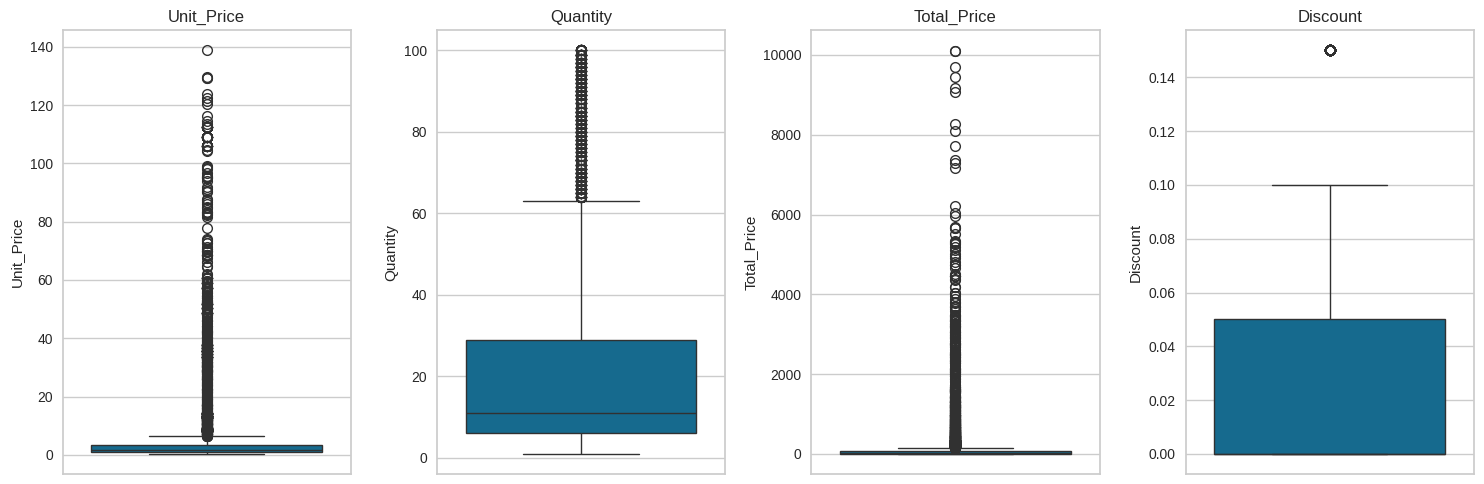

In [67]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=df_sample[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Kesimpulan**

Terlihat pada gambar semua fitur memiliki outlier yang sangat ekstrim dan jumlah yang banyak, maka dari itu saya melakukan winsorizing pada 15% data tertinggi dan terendah.

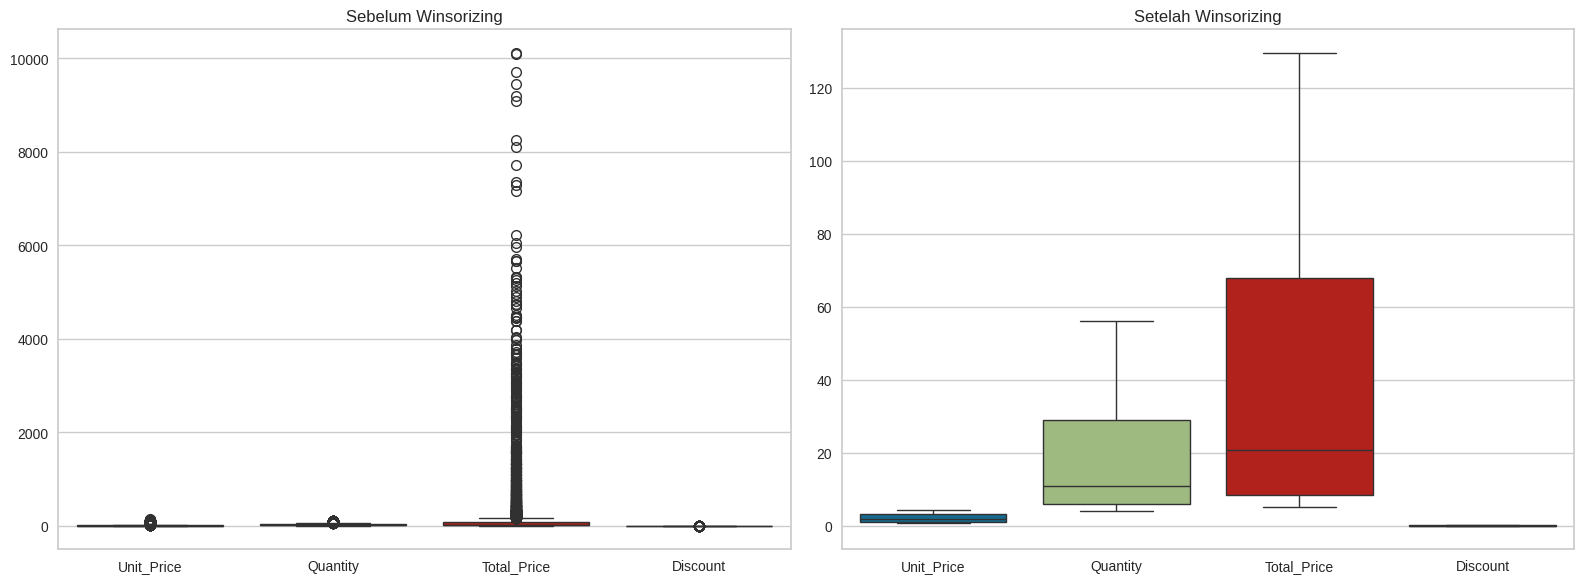

In [68]:
# Membuat figure dan axes dengan 1 baris, 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sebelum Winsorizing
sns.boxplot(data=df_sample[numerical_columns], ax=axes[0])
axes[0].set_title("Sebelum Winsorizing")

# Melakukan Winsorizing (Memotong 15% data teratas dan terbawah)
df_winsor = df_sample.copy()
for col in numerical_columns:
    df_winsor[col] = winsorize(df_winsor[col], limits=[0.15, 0.15])

# Setelah Winsorizing
sns.boxplot(data=df_winsor[numerical_columns], ax=axes[1])
axes[1].set_title("Setelah Winsorizing")

# Mengatur tampilan layout agar tidak bertabrakan
plt.tight_layout()
plt.show()

In [69]:
# Fungsi untuk menghitung jumlah dan persentase outlier
def hitung_outlier(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR)))
    jumlah_outlier = outliers.any(axis=1).sum()
    persentase_outlier = (jumlah_outlier / len(df)) * 100
    return jumlah_outlier, persentase_outlier

# Menghitung jumlah dan persentase outlier sebelum Winsorizing
jumlah_outlier_sebelum, persentase_sebelum = hitung_outlier(df_sample, numerical_columns)

# Menghitung jumlah dan persentase outlier setelah Winsorizing
jumlah_outlier_setelah, persentase_setelah = hitung_outlier(df_winsor, numerical_columns)

# Menampilkan hasil
print(f"Jumlah outlier sebelum Winsorizing: {jumlah_outlier_sebelum}")
print(f"Persentase outlier sebelum Winsorizing: {persentase_sebelum:.2f}%")
print(f"Jumlah outlier setelah Winsorizing: {jumlah_outlier_setelah}")
print(f"Persentase outlier setelah Winsorizing: {persentase_setelah:.2f}%")

Jumlah outlier sebelum Winsorizing: 2449
Persentase outlier sebelum Winsorizing: 24.49%
Jumlah outlier setelah Winsorizing: 0
Persentase outlier setelah Winsorizing: 0.00%


**Kesimpulan**

Dengan menggunakan winsorizing kita bisa membatasi nilai outlier, sehingga outlier yang terdeteksi adalah 0.

## **5. Encoding Data Kategorikal**

In [70]:
df_sample[selected_columns].head()

Customer_Type         Product             Category         Region
4990465           B2B  Hohes C Orange               Juices  Niedersachsen
5995542           B2B      Fritz-Kola          Soft Drinks         Bremen
1044351           B2B          Merlot  Alcoholic Beverages      Thüringen
1802181           B2B  Moët & Chandon  Alcoholic Beverages        Hamburg
6900691           B2C   Granini Apple               Juices        Sachsen

- One Hot Encoding

In [71]:
df_ohe = pd.get_dummies(df_sample, columns=selected_columns, drop_first=True)
print(f"Jumlah fitur setelah One-Hot Encoding: {df_ohe.shape[1]}\n")
df_ohe.head()

Jumlah fitur setelah One-Hot Encoding: 73



Order_ID Customer_ID  Unit_Price  Quantity  Discount  Total_Price  \
4990465  ORD1663596     CUS5073        1.87        74      0.10       124.54   
5995542  ORD1999010      CUS141        1.87        18      0.05        31.98   
1044351   ORD347756      CUS562       12.04        71      0.15       726.61   
1802181   ORD600360     CUS7718       64.91        91      0.10      5316.13   
6900691  ORD2300591     CUS6160        1.64         4      0.00         6.56   

        Order_Date  Discount_YJ  Customer_Type_B2C  Product_Augustiner  ...  \
4990465 2023-11-29     0.036458              False               False  ...   
5995542 2021-05-13     0.028265              False               False  ...   
1044351 2021-04-21     0.038972              False               False  ...   
1802181 2021-08-23     0.036458              False               False  ...   
6900691 2022-10-16     0.000010               True               False  ...   

         Region_Hessen  Region_Mecklenburg-Vorpommern  Region_Niedersachsen  \
4990465          False                          False                  True   
5995542          False                          False                 False   
1044351          False                          False                 False   
1802181          False                          False                 False   
6900691          False                          False                 False   

         Region_Nordrhein-Westfalen  Region_Rheinland-Pfalz  Region_Saarland  \
4990465                       False                   False            False   
5995542                       False                   False            False   
1044351                       False                   False            False   
1802181                       False                   False            False   
6900691                       False                   False            False   

         Region_Sachsen  Region_Sachsen-Anhalt  Region_Schleswig-Holstein  \
4990465           False                  False                      False   
5995542           False                  False                      False   
1044351           False                  False                      False   
1802181           False                  False                      False   
6900691            True                  False                      False   

         Region_Thüringen  
4990465             False  
5995542             False  
1044351              True  
1802181             False  
6900691             False  

[5 rows x 73 columns]

- Label Encoding

In [72]:
df_le = df_sample.copy()
label_encoders = {}  # Dictionary untuk menyimpan LabelEncoder setiap kolom

for col in selected_columns:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_le[col])
    label_encoders[col] = le  # Simpan LabelEncoder agar bisa digunakan nanti

print(f"Jumlah fitur setelah Label Encoding: {df_le.shape[1]}")
df_le[selected_columns].head()

Jumlah fitur setelah Label Encoding: 12


Customer_Type  Product  Category  Region
4990465              0       15         1       8
5995542              0       11         2       4
1044351              0       22         0      15
1802181              0       26         0       5
6900691              1       13         1      12

In [73]:
df_le[selected_columns].max()

Customer_Type     1
Product          46
Category          3
Region           15
dtype: int64

## **6. Binning (Pengelompokan Data)**

In [74]:
# Copy dataset untuk Binning
df_binned = df_sample.copy()

# Binning untuk Unit_Price berdasarkan quantile (Equal Frequency)
df_binned['Price_Category'] = pd.qcut(df_binned['Unit_Price'], q=3, labels=["Murah", "Sedang", "Mahal"])

# Binning untuk Quantity berdasarkan quantile (Equal Frequency)
df_binned['Quantity_Category'] = pd.qcut(df_binned['Quantity'], q=3, labels=["Rendah", "Sedang", "Tinggi"])

# Binning untuk Discount berdasarkan quantile (Equal Frequency)
discount_mapping = {0.00: "Tanpa Diskon", 0.05: "Kecil", 0.10: "Sedang", 0.15: "Besar"}
df_binned['Discount_Category'] = df_binned['Discount'].map(discount_mapping)

# Binning untuk Total_Price berdasarkan quantile (Equal Frequency)
df_binned['TotalPrice_Category'] = pd.qcut(df_binned['Total_Price'], q=4, labels=["Murah", "Sedang", "Mahal", "Sangat Mahal"])

# Cek hasil
display(df_binned[['Unit_Price', 'Price_Category']].head())
display(df_binned[['Quantity', 'Quantity_Category']].head())
display(df_binned[['Discount', 'Discount_Category']].head())
display(df_binned[['Total_Price', 'TotalPrice_Category']].head())

Unit_Price Price_Category
4990465        1.87         Sedang
5995542        1.87         Sedang
1044351       12.04          Mahal
1802181       64.91          Mahal
6900691        1.64         Sedang

Quantity Quantity_Category
4990465        74            Tinggi
5995542        18            Tinggi
1044351        71            Tinggi
1802181        91            Tinggi
6900691         4            Rendah

Discount Discount_Category
4990465      0.10            Sedang
5995542      0.05             Kecil
1044351      0.15             Besar
1802181      0.10            Sedang
6900691      0.00      Tanpa Diskon

Total_Price TotalPrice_Category
4990465       124.54        Sangat Mahal
5995542        31.98               Mahal
1044351       726.61        Sangat Mahal
1802181      5316.13        Sangat Mahal
6900691         6.56               Murah

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [75]:
# Gunakan dataset yang sudah dinormalisasi
df_cluster = df_log[numerical_columns].copy()  # df_normalized adalah data hasil normalisasi

# Menentukan jumlah cluster optimal dengan metode Elbow
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Coba dari 2 hingga 10 cluster

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_cluster, kmeans.labels_))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

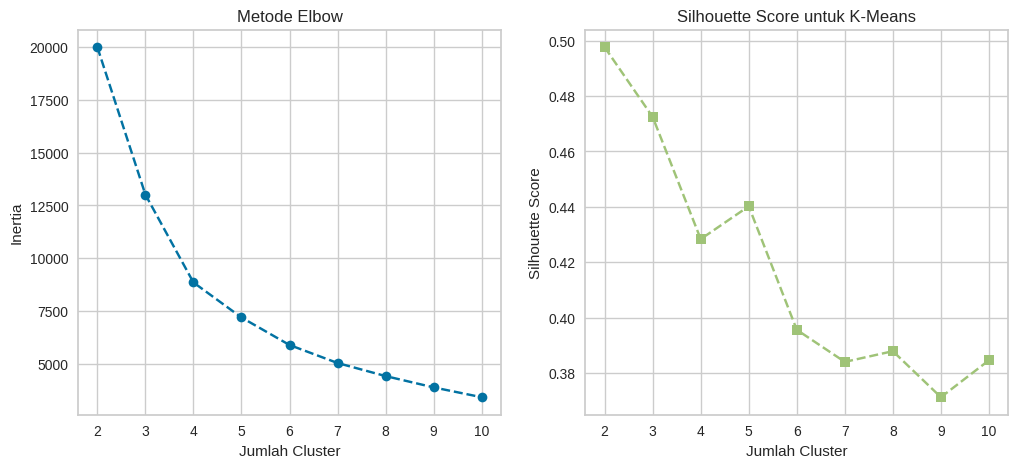

In [76]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Metode Elbow")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='--', color='g')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk K-Means")

plt.show()

**Kesimpulan**

Terlihat hasil dari Silhoutte Score masih dibawah dari apa yang diharapkan yaitu minimal 0.7, pada percobaan pertama SIlhoutte Score terbaik yaitu 0.5 dengan K = 2. Agar Silhoutte Score nya bisa mencapai minimal 0.7 maka dilakukanlah proses Feature Selection.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [77]:
# Pilih kolom numerik & kategorikal
numerical_columns = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
selected_columns = ['Customer_Type', 'Product', 'Category', 'Region']

df_selected = df_sample[numerical_columns + selected_columns].copy()

# One-Hot Encoding untuk data kategorikal
df_encoded = pd.get_dummies(df_selected, columns=selected_columns, drop_first=True)

# Normalisasi data numerik
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Feature Selection dengan Mutual Information
X = df_encoded
y = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X)  # Dummy clustering label
selector = SelectKBest(score_func=mutual_info_classif, k=7) # Fitur campuran kategorikal dan numerikal (minimal 5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Fitur yang dipilih:", list(selected_features))

# Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Uji beberapa algoritma clustering
def evaluate_clustering(X, method="kmeans"):
    best_silhouette = 0
    best_k = 0
    for k in range(2, 11):
        if method == "kmeans":
            model = KMeans(n_clusters=k, random_state=42, n_init=10)
        elif method == "agglomerative":
            model = AgglomerativeClustering(n_clusters=k)
        elif method == "gmm":
            model = GaussianMixture(n_components=k, random_state=42)

        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        print(f"Method = {method}, K={k}, Silhouette Score = {score:.4f}")

        if score > best_silhouette:
            best_silhouette = score
            best_k = k

    print(f"Silhouette Score terbaik dengan {method}: {best_silhouette:.4f} pada K={best_k}\n")

# Evaluasi dengan berbagai metode
evaluate_clustering(X_pca, method="kmeans")
evaluate_clustering(X_pca, method="agglomerative")
evaluate_clustering(X_pca, method="gmm")

Fitur yang dipilih: ['Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Customer_Type_B2C', 'Product_Moët & Chandon', 'Product_Veuve Clicquot']
Method = kmeans, K=2, Silhouette Score = 0.6773
Method = kmeans, K=3, Silhouette Score = 0.7156
Method = kmeans, K=4, Silhouette Score = 0.7299
Method = kmeans, K=5, Silhouette Score = 0.7224
Method = kmeans, K=6, Silhouette Score = 0.7275
Method = kmeans, K=7, Silhouette Score = 0.7337
Method = kmeans, K=8, Silhouette Score = 0.7133
Method = kmeans, K=9, Silhouette Score = 0.7183
Method = kmeans, K=10, Silhouette Score = 0.7208
Silhouette Score terbaik dengan kmeans: 0.7337 pada K=7

Method = agglomerative, K=2, Silhouette Score = 0.6304
Method = agglomerative, K=3, Silhouette Score = 0.6814
Method = agglomerative, K=4, Silhouette Score = 0.6682
Method = agglomerative, K=5, Silhouette Score = 0.7235
Method = agglomerative, K=6, Silhouette Score = 0.7260
Method = agglomerative, K=7, Silhouette Score = 0.7313
Method = agglomerative, K=8, Silh

**Kesimpulan**

Saya menggunakan 3 metode untuk melihat mana metode yang terbaik untuk mendapatkan Silhoutte Score dengan minimal nilai 0.7, terlihat pada hasil output diatas bahwa terdapat 2 nilai Silhoutte Score yang bernilai minimal 0.7 yaitu pada metode Kmeans 0.7337 pada K = 7, dan Agglomerative agglomerative: 0.7313 pada K = 7.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

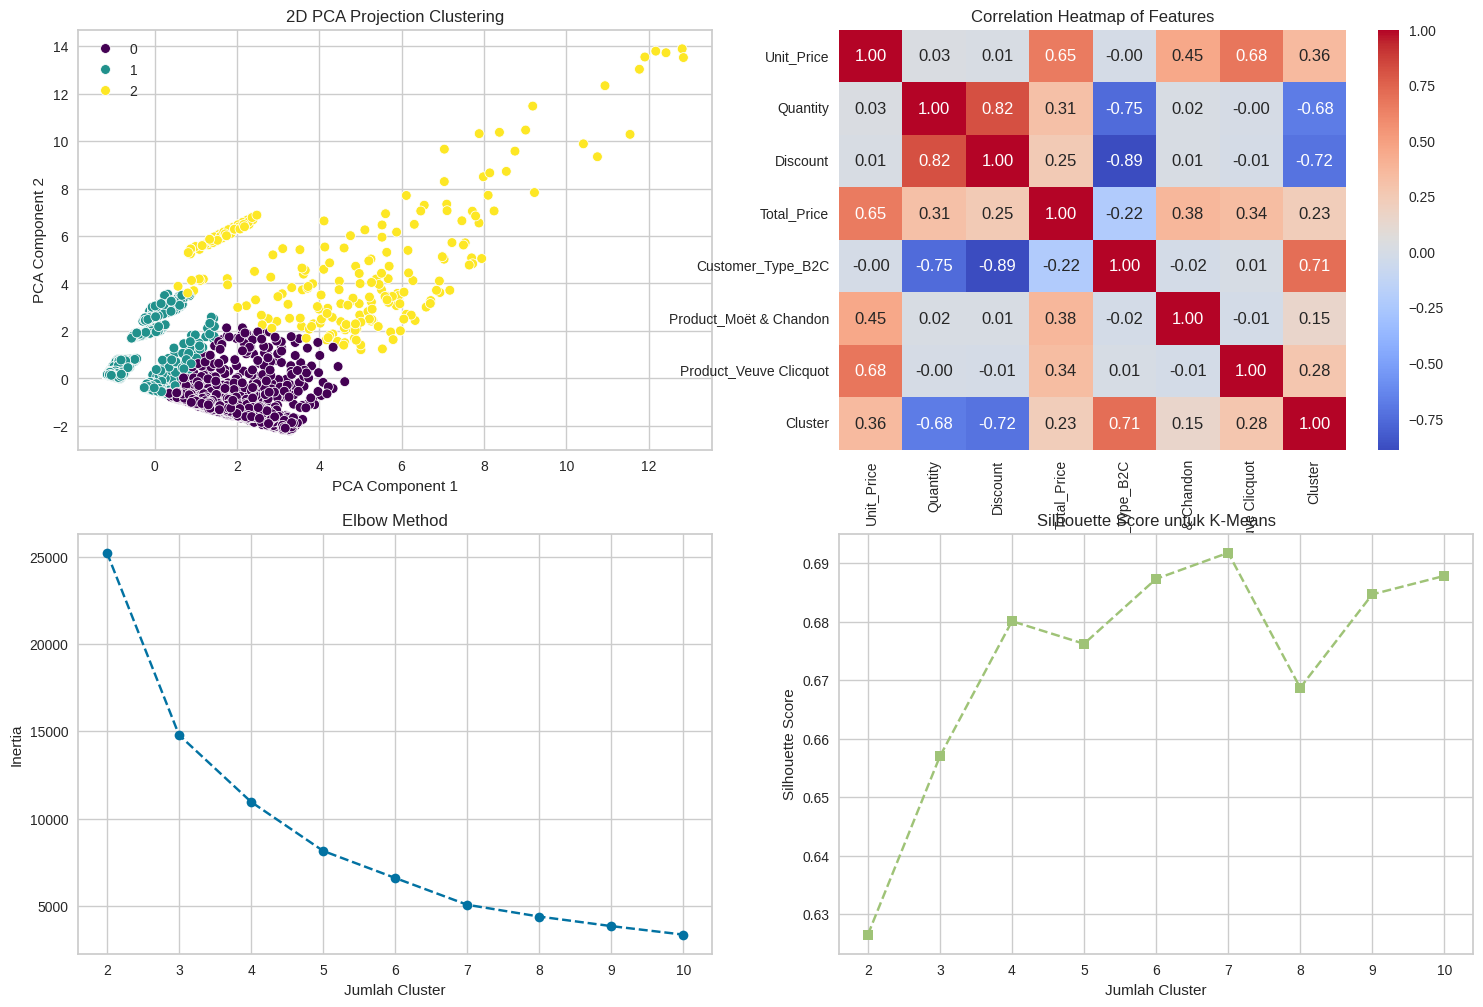

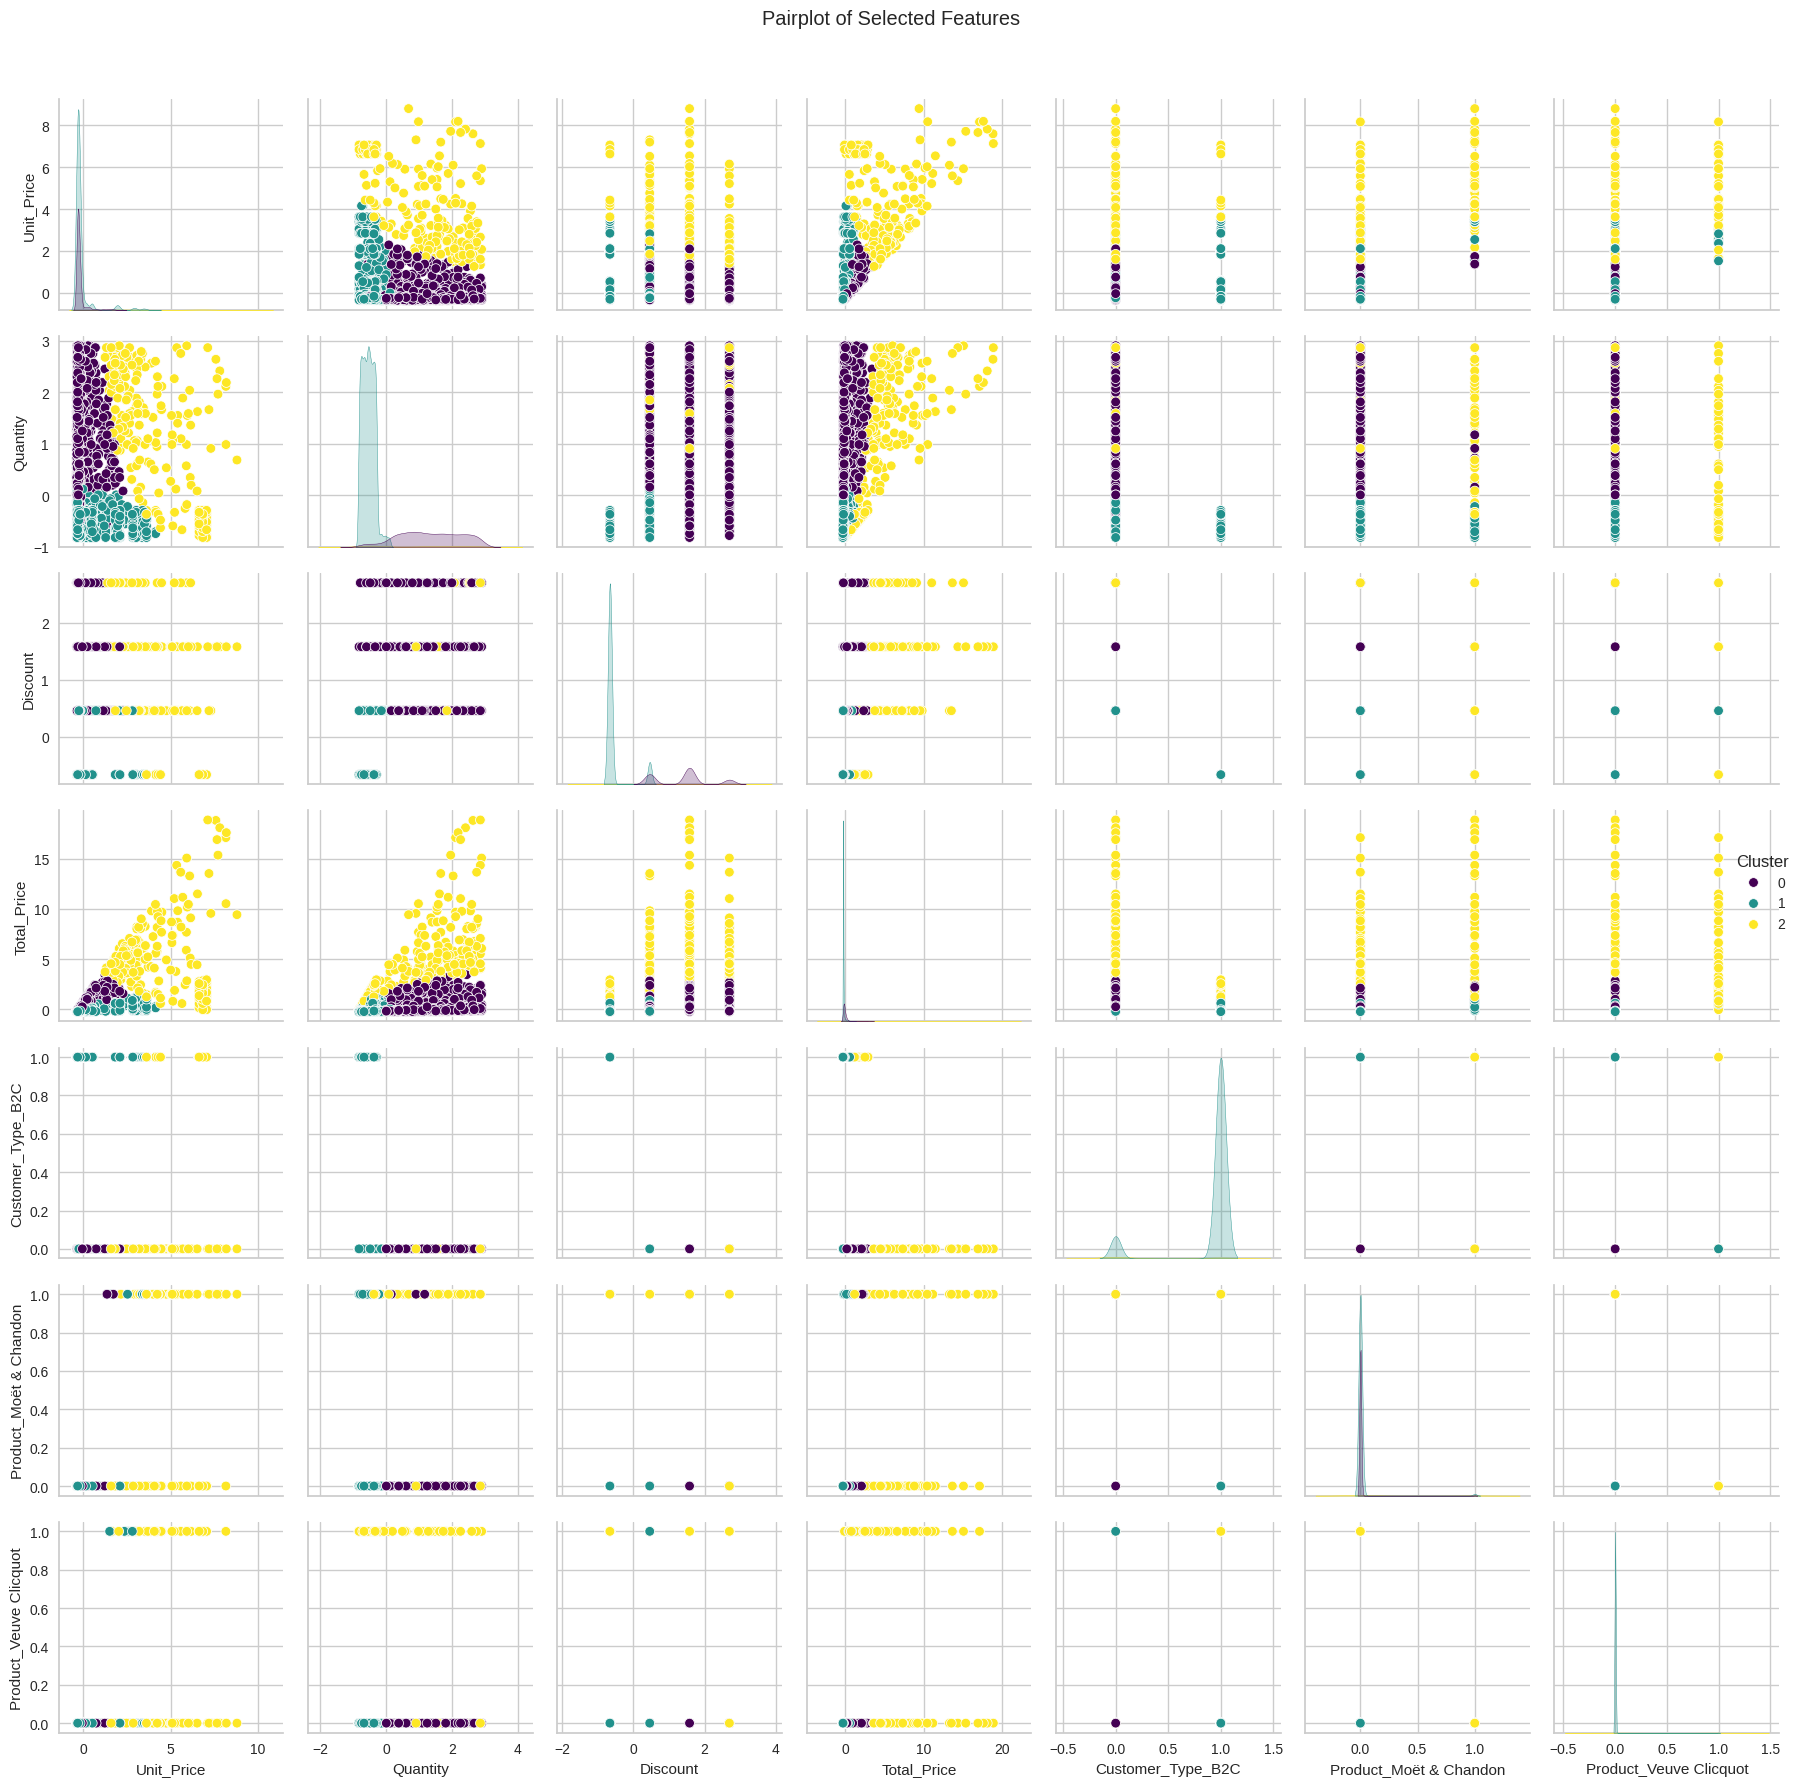

In [78]:
# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_selected)

# Membuat figure besar untuk semua subplot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Scatter Plot PCA Projection
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50, ax=axes[0, 0])
axes[0, 0].set_xlabel("PCA Component 1")
axes[0, 0].set_ylabel("PCA Component 2")
axes[0, 0].set_title("2D PCA Projection Clustering")

# 3. Pairplot (Akan ditampilkan di jendela terpisah)
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_selected_df['Cluster'] = labels
sns.pairplot(X_selected_df, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of Selected Features", y=1.02)

# 4. Heatmap Korelasi
sns.heatmap(X_selected_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 1])
axes[0, 1].set_title("Correlation Heatmap of Features")

# 5. Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_selected, kmeans.labels_))

axes[1, 0].plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
axes[1, 0].set_xlabel("Jumlah Cluster")
axes[1, 0].set_ylabel("Inertia")
axes[1, 0].set_title("Elbow Method")

# 6. Silhouette Score Plot
axes[1, 1].plot(cluster_range, silhouette_scores, marker='s', linestyle='--', color='g')
axes[1, 1].set_xlabel("Jumlah Cluster")
axes[1, 1].set_ylabel("Silhouette Score")
axes[1, 1].set_title("Silhouette Score untuk K-Means")

plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [79]:
df_normalized = df_log.copy()
df_normalized['Cluster'] = kmeans.labels_
df_normalized.head()

Order_ID Customer_ID Customer_Type         Product  \
4990465  ORD1663596     CUS5073           B2B  Hohes C Orange   
5995542  ORD1999010      CUS141           B2B      Fritz-Kola   
1044351   ORD347756      CUS562           B2B          Merlot   
1802181   ORD600360     CUS7718           B2B  Moët & Chandon   
6900691  ORD2300591     CUS6160           B2C   Granini Apple   

                    Category  Unit_Price  Quantity  Discount  Total_Price  \
4990465               Juices    1.054312  4.317488  0.095310     4.832624   
5995542          Soft Drinks    1.054312  2.944439  0.048790     3.495901   
1044351  Alcoholic Beverages    2.568022  4.276666  0.139762     6.589765   
1802181  Alcoholic Beverages    4.188290  4.521789  0.095310     8.578689   
6900691               Juices    0.970779  1.609438  0.000000     2.022871   

                Region Order_Date  Cluster  
4990465  Niedersachsen 2023-11-29        3  
5995542         Bremen 2021-05-13        8  
1044351      Thüringen 2021-04-21        3  
1802181        Hamburg 2021-08-23        2  
6900691        Sachsen 2022-10-16        1

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [80]:
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
df_normalized[features] = scaler.inverse_transform(df_normalized[features])
df_normalized

Order_ID Customer_ID Customer_Type         Product  \
4990465  ORD1663596     CUS5073           B2B  Hohes C Orange   
5995542  ORD1999010      CUS141           B2B      Fritz-Kola   
1044351   ORD347756      CUS562           B2B          Merlot   
1802181   ORD600360     CUS7718           B2B  Moët & Chandon   
6900691  ORD2300591     CUS6160           B2C   Granini Apple   
...             ...         ...           ...             ...   
1361788   ORD453552     CUS4736           B2B     Havana Club   
846029    ORD281754     CUS7925           B2B        Riesling   
2915         ORD994     CUS5581           B2C      Fritz-Kola   
6947958  ORD2316241     CUS7457           B2C     Mango Juice   
267988     ORD89057     CUS4504           B2C           Fanta   

                    Category  Unit_Price    Quantity  Discount  Total_Price  \
4990465               Juices   21.788633  137.496565  0.033756  2691.343429   
5995542          Soft Drinks   21.788633  101.016747  0.031676  1984.355357   
1044351  Alcoholic Beverages   44.634094  136.411987  0.035743  3620.688886   
1802181  Alcoholic Beverages   69.087783  142.924517  0.033756  4672.623551   
6900691               Juices   20.527920   65.547807  0.029495  1205.274995   
...                      ...         ...         ...       ...          ...   
1361788  Alcoholic Beverages   57.747319  145.139839  0.035743  4280.445967   
846029   Alcoholic Beverages   33.413337  130.205197  0.033756  3082.638843   
2915             Soft Drinks   22.706695   94.736258  0.029495  1928.951198   
6947958               Juices   27.925580   92.903223  0.029495  2137.190504   
267988           Soft Drinks   17.707498   70.391813  0.029495  1160.779188   

                  Region Order_Date  Cluster  
4990465    Niedersachsen 2023-11-29        3  
5995542           Bremen 2021-05-13        8  
1044351        Thüringen 2021-04-21        3  
1802181          Hamburg 2021-08-23        2  
6900691          Sachsen 2022-10-16        1  
...                  ...        ...      ...  
1361788   Sachsen-Anhalt 2023-03-04        9  
846029   Rheinland-Pfalz 2023-08-31        7  
2915              Berlin 2022-10-22        1  
6947958           Bremen 2023-07-11        1  
267988          Saarland 2022-02-05        1  

[10000 rows x 12 columns]

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [81]:
numeric_features = [col for col in df_sample.select_dtypes(include=['number']).columns if col != 'Discount_YJ']
num_features_list = numeric_features.copy()
num_features_list.append('Cluster')
summary_stats = df_normalized[num_features_list].groupby('Cluster').agg(['mean', 'min', 'max']).T
summary_stats

Cluster                     0            1            2            3  \
Unit_Price  mean    21.344251    21.902080    66.005964    22.872202   
            min     10.180593    11.588070    58.874103    10.517240   
            max     51.358508    47.006817    75.337172    47.664794   
Quantity    mean   128.663669    77.121509   137.361961   140.103133   
            min    117.996125    41.203362   114.023295   132.007140   
            max    143.777054    96.450948   145.404204   145.404204   
Discount    mean     0.031676     0.029495     0.033956     0.034313   
            min      0.031676     0.029495     0.031676     0.031676   
            max      0.031676     0.029495     0.035743     0.035743   
Total_Price mean  2468.962672  1479.926804  4446.452411  2756.010309   
            min   1504.044799   335.539339  4206.180600  1727.170937   
            max   3780.701934  2975.650838  4672.623551  3872.796700   

Cluster                     4            5            6            7  \
Unit_Price  mean    76.346318    62.849348    76.672197    21.685970   
            min     69.857798    56.774898    72.810838    10.405857   
            max     80.427437    70.773791    77.285356    56.924303   
Quantity    mean   137.610175    77.701065    82.683864   119.774053   
            min    122.091673    41.203362    41.203362    51.975951   
            max    145.404204   112.251407   112.251407   132.864262   
Discount    mean     0.033649     0.029689     0.029698     0.034034   
            min      0.031676     0.029495     0.029495     0.033756   
            max      0.035743     0.031676     0.033756     0.035743   
Total_Price mean  4823.761095  3116.465059  3725.478370  2279.043588   
            min   4652.618484  2009.717191  2622.365665   501.988726   
            max   5012.642643  3831.576292  4273.300925  3651.214481   

Cluster                     8            9  
Unit_Price  mean    21.461500    58.016332  
            min     10.180593    47.056187  
            max     59.352984    70.471810  
Quantity    mean    91.356487   129.754532  
            min     41.203362   102.379531  
            max    117.996125   145.139839  
Discount    mean     0.031892     0.033235  
            min      0.031676     0.031676  
            max      0.033756     0.035743  
Total_Price mean  1706.537866  4015.230616  
            min    294.109908  3684.905076  
            max   3583.386133  4301.893320

<ipython-input-82-e02f81167986>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=subset, palette="Set1", ax=ax)
<ipython-input-82-e02f81167986>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=subset, palette="Set1", ax=ax)
<ipython-input-82-e02f81167986>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=subset, palette="Set1", ax=ax)
<ipython-input-82-e02f81167986>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

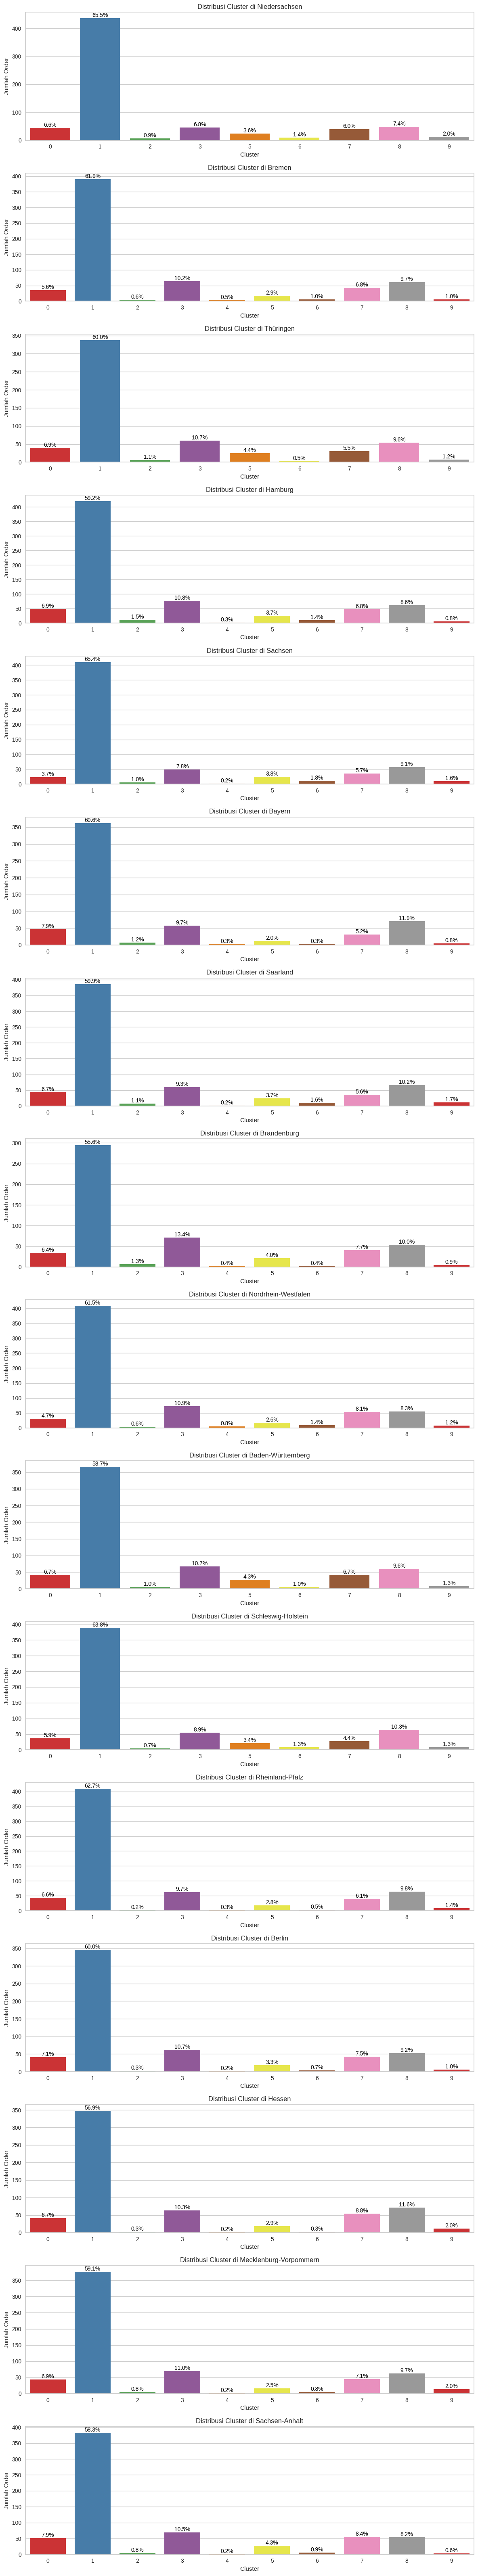

In [82]:
# Mendapatkan daftar unik wilayah
regions = df_normalized['Region'].unique()

# Menentukan ukuran figure dengan jumlah subplot yang sesuai
num_regions = len(regions)
fig, axes = plt.subplots(nrows=num_regions, figsize=(12, 4 * num_regions))

# Jika hanya satu wilayah, ubah axes menjadi list agar bisa diiterasi
if num_regions == 1:
    axes = [axes]

# Loop untuk membuat setiap subplot berdasarkan wilayah
for ax, region in zip(axes, regions):
    subset = df_normalized[df_normalized['Region'] == region]

    # Membuat countplot untuk setiap wilayah
    sns.countplot(x='Cluster', data=subset, palette="Set1", ax=ax)

    # Menambahkan persentase pada setiap bar
    total_per_cluster = subset['Cluster'].value_counts()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f"{height / total_per_cluster.sum() * 100:.1f}%"
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    ax.set_title(f"Distribusi Cluster di {region}")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Jumlah Order")

plt.tight_layout()
plt.show()

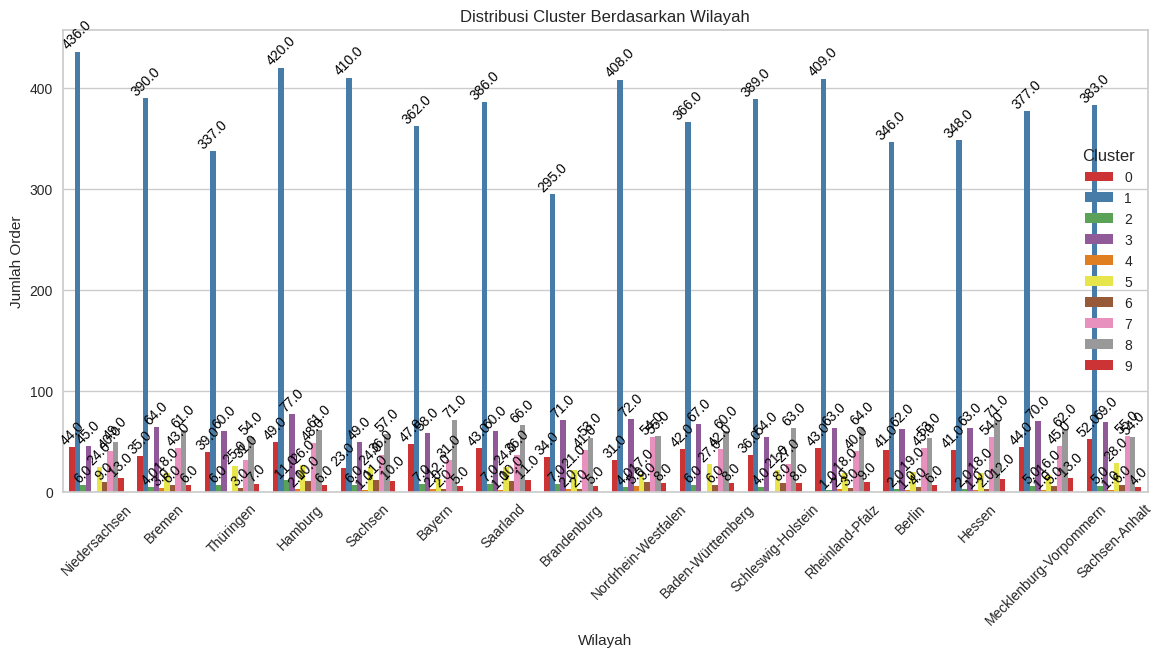

In [83]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Region', hue='Cluster', data=df_normalized, palette="Set1")

# Menambahkan jumlah order di setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height}",
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black',
                    rotation=45)

plt.xticks(rotation=45)
plt.title("Distribusi Cluster Berdasarkan Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Order")
plt.legend(title="Cluster")
plt.show()

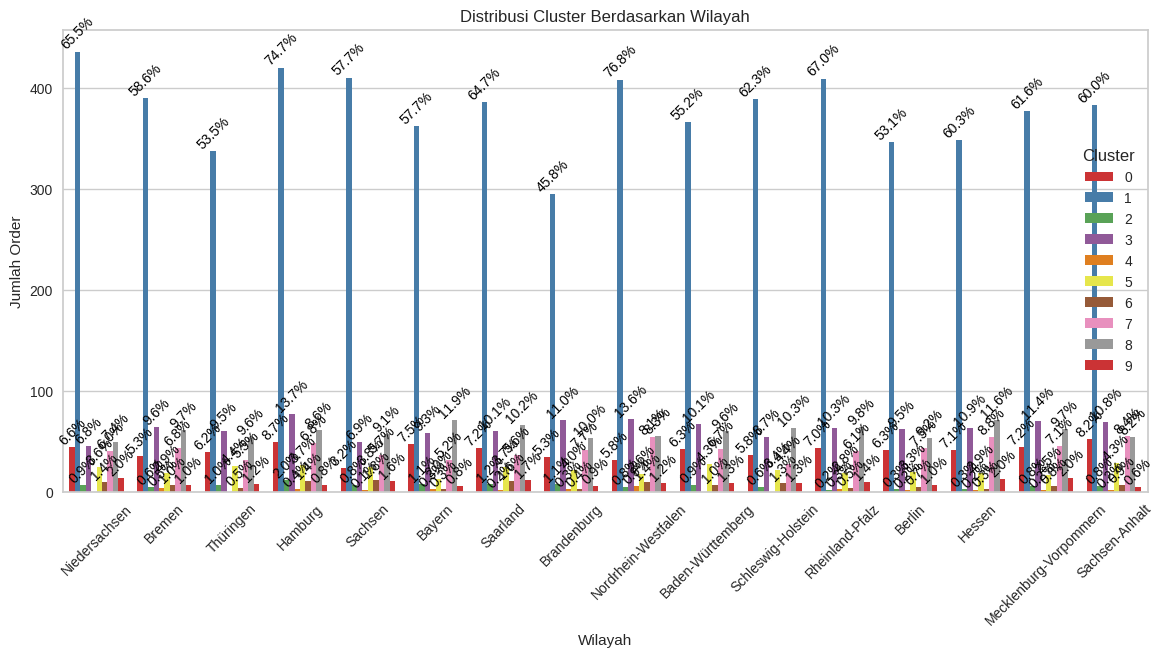

In [84]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Region', hue='Cluster', data=df_normalized, palette="Set1")

# Menghitung total jumlah order per wilayah
total_per_region = df_normalized['Region'].value_counts()

# Menambahkan persentase pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        region = p.get_x() + p.get_width() / 2
        total = total_per_region[ax.get_xticklabels()[int(region)].get_text()]
        percentage = f"{height / total * 100:.1f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black',
                    rotation=45)

plt.xticks(rotation=45)
plt.title("Distribusi Cluster Berdasarkan Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Order")
plt.legend(title="Cluster")
plt.show()

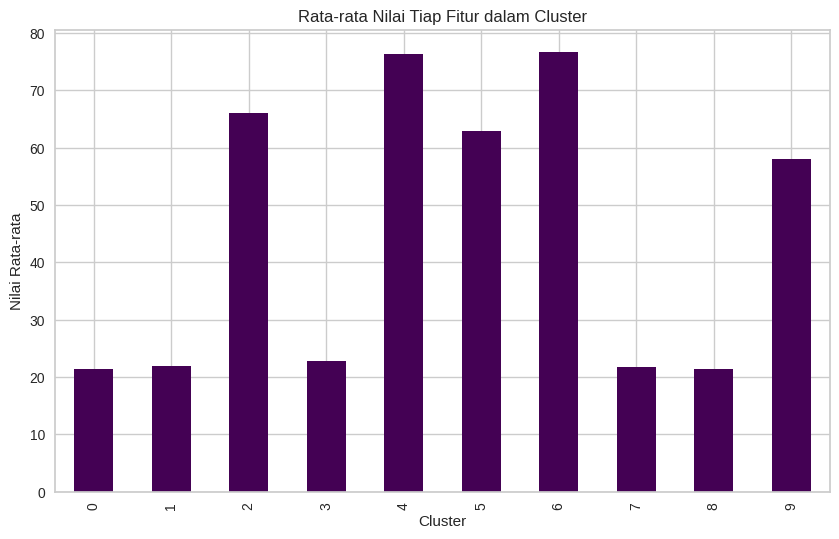

In [85]:
df_mean = df_normalized.groupby('Cluster')['Unit_Price'].mean()
df_mean.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Rata-rata Nilai Tiap Fitur dalam Cluster')
plt.ylabel('Nilai Rata-rata')
plt.show()

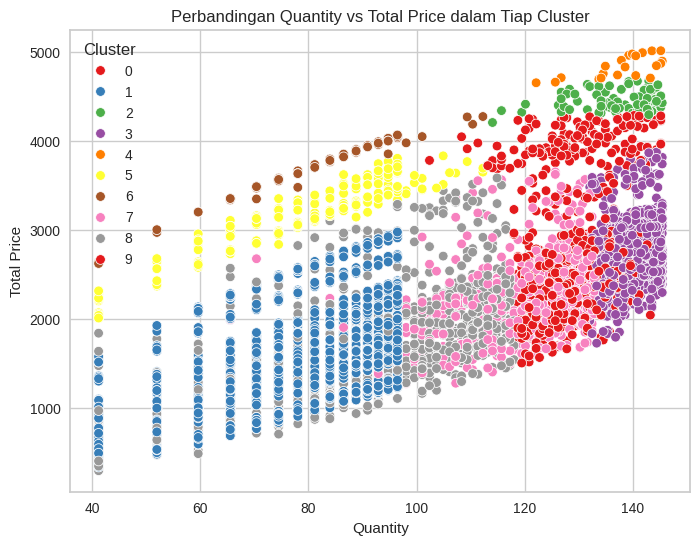

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_normalized['Quantity'], y=df_normalized['Total_Price'], hue=df_normalized['Cluster'], palette='Set1')
plt.title('Perbandingan Quantity vs Total Price dalam Tiap Cluster')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.legend(title='Cluster')
plt.show()

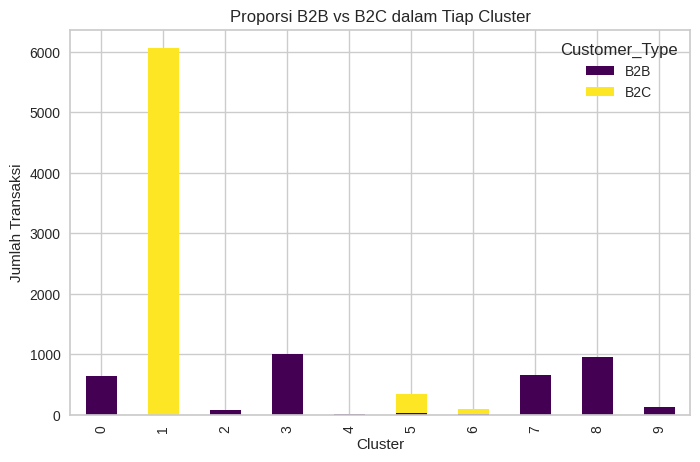

In [87]:
# Hitung proporsi B2B vs B2C dalam tiap cluster
customer_cluster = df_normalized.groupby(['Cluster', 'Customer_Type']).size().unstack()

# Plot
customer_cluster.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title('Proporsi B2B vs B2C dalam Tiap Cluster')
plt.ylabel('Jumlah Transaksi')
plt.show()

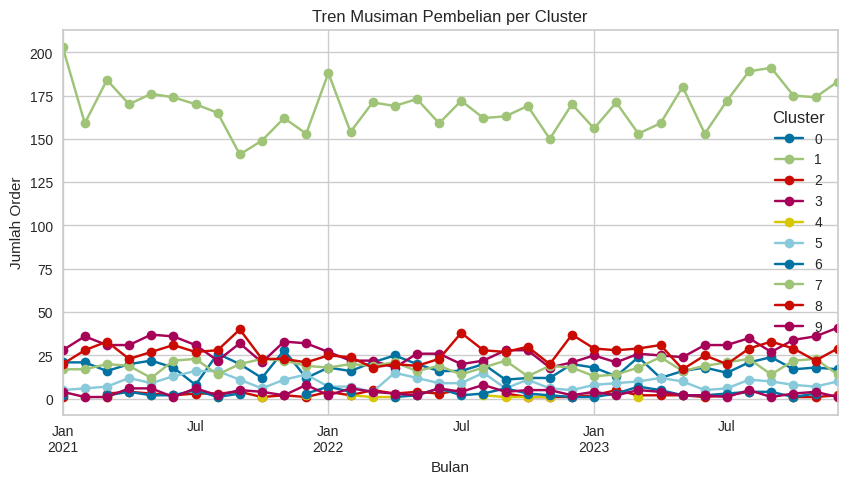

In [88]:
df_normalized['Order_Month'] = pd.to_datetime(df_normalized['Order_Date']).dt.to_period('M')
monthly_cluster = df_normalized.groupby(['Order_Month', 'Cluster']).size().unstack()
monthly_cluster.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('Tren Musiman Pembelian per Cluster')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.legend(title='Cluster')
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Setelah melakukan clustering menggunakan metode KMeans, saya menganalisis karakteristik dari setiap cluster berdasarkan variabel `Unit_Price`, `Quantity`, `Discount`, dan `Total_Price`. Berikut adalah hasil analisisnya:

## Cluster 0
- **Rata-rata Unit Price:** 21.34 (terendah di antara semua cluster)
- **Rata-rata Quantity:** 128.66 (cukup tinggi)
- **Rata-rata Discount:** 3.17%
- **Rata-rata Total Price:** 2468.96
- **Analisis:** Cluster ini mencerminkan produk dengan harga satuan rendah namun sering dibeli dalam jumlah banyak. Ini bisa menunjukkan bahwa produk dalam cluster ini adalah barang kebutuhan sehari-hari yang memiliki permintaan tinggi tetapi dengan harga terjangkau.

## Cluster 1:
- **Rata-rata Unit Price:** 21.90
- **Rata-rata Quantity:** 77.12 (terendah di antara semua cluster)
- **Rata-rata Discount:** 2.95%
- **Rata-rata Total Price:** 1479.93
- **Analisis:** Produk dalam cluster ini memiliki harga yang masih rendah tetapi tidak dibeli dalam jumlah besar. Ini bisa mencerminkan produk yang lebih selektif atau niche, di mana hanya pelanggan tertentu yang tertarik untuk membelinya.

## Cluster 2:
- **Rata-rata Unit Price:** 66.00
- **Rata-rata Quantity:** 137.36
- **Rata-rata Discount:** 3.39%
- **Rata-rata Total Price:** 4446.45
- **Analisis:** Produk dalam cluster ini memiliki harga yang cukup tinggi namun tetap dibeli dalam jumlah besar, sehingga menghasilkan total transaksi yang sangat tinggi. Hal ini menunjukkan bahwa produk dalam cluster ini adalah barang premium yang memiliki pasar loyal.

## Cluster 3:
- **Rata-rata Unit Price:** 22.87
- **Rata-rata Quantity:** 140.10
- **Rata-rata Discount:** 3.43%
- **Rata-rata Total Price:** 2756.01
- **Analisis:** Cluster ini memiliki harga satuan rendah hingga menengah dengan jumlah pembelian yang tinggi. Hal ini mirip dengan Cluster 0, tetapi dengan harga yang sedikit lebih tinggi dan pembelian yang lebih sering. Produk dalam cluster ini mungkin termasuk barang konsumsi reguler yang memiliki daya tarik lebih tinggi dibandingkan produk di Cluster 0.

## Cluster 4:
- **Rata-rata Unit Price:** 76.34 (tertinggi di antara semua cluster)
- **Rata-rata Quantity:** 137.61
- **Rata-rata Discount:** 3.36%
- **Rata-rata Total Price:** 4823.76 (tertinggi di antara semua cluster)
- **Analisis:** Cluster ini terdiri dari produk premium dengan harga tinggi dan pembelian dalam jumlah besar. Produk dalam cluster ini kemungkinan merupakan barang eksklusif yang ditargetkan kepada pelanggan dengan daya beli tinggi.

## Cluster 5:
- **Rata-rata Unit Price:** 62.84
- **Rata-rata Quantity:** 77.70
- **Rata-rata Discount:** 2.96%
- **Rata-rata Total Price:** 3116.46
- **Analisis:** Cluster ini memiliki produk dengan harga tinggi tetapi jumlah pembelian yang lebih rendah dibandingkan cluster premium lainnya. Hal ini menunjukkan bahwa produk dalam kategori ini adalah barang dengan nilai tinggi tetapi pasarnya lebih terbatas dibandingkan produk premium di Cluster 4.

## Cluster 6:
- **Rata-rata Unit Price:** 76.67
- **Rata-rata Quantity:** 82.68
- **Rata-rata Discount:** 2.96%
- **Rata-rata Total Price:** 3725.47
- **Analisis:** Cluster ini juga termasuk produk premium dengan harga yang sangat tinggi, tetapi jumlah pembeliannya lebih rendah dibandingkan Cluster 4. Produk dalam cluster ini mungkin memiliki pangsa pasar khusus dan eksklusif.

## Cluster 7:
- **Rata-rata Unit Price:** 21.68
- **Rata-rata Quantity:** 199.77
- **Rata-rata Discount:** 3.40%
- **Rata-rata Total Price:** 2279.04
- **Analisis:** Produk dalam cluster ini memiliki harga yang rendah dan cukup sering dibeli, tetapi lebih sedikit dibandingkan dengan Cluster 0 atau 3. Hal ini menunjukkan bahwa produk dalam cluster ini masih merupakan produk umum, tetapi tidak sepopuler barang di Cluster 0.

## Cluster 8:
- **Rata-rata Unit Price:** 21.46
- **Rata-rata Quantity:** 91.35
- **Rata-rata Discount:** 3.18%
- **Rata-rata Total Price:** 1706.53
- **Analisis:** Cluster ini memiliki harga unit rendah dan pembelian yang cukup rendah dibandingkan dengan cluster lainnya. Produk dalam cluster ini mungkin merupakan barang dengan daya tarik rendah atau permintaan musiman.

## Cluster 9:
- **Rata-rata Unit Price:** 58.01
- **Rata-rata Quantity:** 129.75
- **Rata-rata Discount:** 3.32%
- **Rata-rata Total Price:** 4015.23
- **Analisis:** Cluster ini memiliki harga unit yang cukup tinggi dengan pembelian dalam jumlah besar. Produk dalam cluster ini berada dalam kategori premium tetapi masih dalam batas yang wajar untuk pelanggan kelas menengah ke atas.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [90]:
df_normalized.to_csv('Dataset_clustering.csv', index=False)